In [258]:
import sys
sys.executable
import pandas as pd
import numpy as np
import scipy
import locale

In [259]:
### We have three data sets for weather data
# 1. Airport
# 2. Barcelona station
# 3. Fabra Observatory (at altitude)
# The Fabra observatory is at an altitude of over 400 metres and so pressure and temperature data are lower
# values than experienced in Barcelona city.
# The Barcelona station data set is incomplete.  No pressure readings are recorded at all and we have
# more data missing from the data set.
# The solution applied is to use the Airport data set and include data from Barcelona station to populate missing
# data values, then to use adjusted pressure data from Fabra Observatory to replace missing pressure values.

# We now load the three data sets

rawCsvData=pd.read_csv("data/Weather/HistoricalWeatherDataBCNAirport.csv", decimal=',')
dfWeatherAirport=rawCsvData.copy()

rawCsvData=pd.read_csv("data/Weather/HistoricalWeatherDataBCN.csv", decimal=',')
dfWeatherBcn=rawCsvData.copy()

rawCsvData=pd.read_csv("data/Weather/HistoricalWeatherDataBCNFabra.csv", decimal=',')
dfWeatherFabra=rawCsvData.copy()

In [260]:
dfWeatherAirport.describe

<bound method NDFrame.describe of            fecha  indicativo                nombre  provincia  altitud  tmed  \
0     2017-01-01          76  BARCELONA AEROPUERTO  BARCELONA        4   7.8   
1     2017-01-02          76  BARCELONA AEROPUERTO  BARCELONA        4   8.6   
2     2017-01-03          76  BARCELONA AEROPUERTO  BARCELONA        4   8.1   
3     2017-01-04          76  BARCELONA AEROPUERTO  BARCELONA        4  10.4   
4     2017-01-05          76  BARCELONA AEROPUERTO  BARCELONA        4   8.8   
...          ...         ...                   ...        ...      ...   ...   
1395  2020-10-27          76  BARCELONA AEROPUERTO  BARCELONA        4  15.7   
1396  2020-10-28          76  BARCELONA AEROPUERTO  BARCELONA        4  16.0   
1397  2020-10-29          76  BARCELONA AEROPUERTO  BARCELONA        4  16.5   
1398  2020-10-30          76  BARCELONA AEROPUERTO  BARCELONA        4  16.3   
1399  2020-10-31          76  BARCELONA AEROPUERTO  BARCELONA        4  15.9   

     

In [261]:
dfWeatherAirport.describe()

,indicativo,altitud,tmed,tmin,tmax,velmedia,racha,sol,presMax,presMin
count,1400.0,1400.0,1395.000000,1395.000000,1395.000000,1397.000000,1394.000000,1399.000000,1398.000000,1398.000000
mean,76.0,4.0,17.821577,13.864229,21.781720,4.580601,10.736657,6.949249,1018.809657,1014.141845
std,0.0,0.0,6.020405,6.385480,5.818068,1.620279,3.141030,3.792312,6.138294,7.065691
min,76.0,4.0,3.400000,-0.600000,5.100000,1.400000,5.800000,0.000000,994.500000,987.400000
25%,76.0,4.0,12.700000,8.400000,16.900000,3.600000,8.900000,4.200000,1015.300000,1010.900000
50%,76.0,4.0,17.200000,13.500000,21.400000,4.200000,9.700000,7.400000,1018.500000,1014.500000
75%,76.0,4.0,23.100000,19.500000,26.900000,5.300000,12.500000,10.200000,1022.300000,1018.200000
max,76.0,4.0,32.100000,27.300000,37.000000,18.900000,30.800000,13.200000,1037.000000,1034.000000


In [262]:
### We check the data types and fix them
dfWeatherAirport.info()
dfWeatherAirport.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fecha        1400 non-null   object 
 1   indicativo   1400 non-null   int64  
 2   nombre       1400 non-null   object 
 3   provincia    1400 non-null   object 
 4   altitud      1400 non-null   int64  
 5   tmed         1395 non-null   float64
 6   prec         1396 non-null   object 
 7   tmin         1395 non-null   float64
 8   horatmin     1395 non-null   object 
 9   tmax         1395 non-null   float64
 10  horatmax     1395 non-null   object 
 11  dir          1394 non-null   object 
 12  velmedia     1397 non-null   float64
 13  racha        1394 non-null   float64
 14  horaracha    1394 non-null   object 
 15  sol          1399 non-null   float64
 16  presMax      1398 non-null   float64
 17  horaPresMax  1397 non-null   object 
 18  presMin      1398 non-null   float64
 19  horaPr

fecha          0
indicativo     0
nombre         0
provincia      0
altitud        0
tmed           5
prec           4
tmin           5
horatmin       5
tmax           5
horatmax       5
dir            6
velmedia       3
racha          6
horaracha      6
sol            1
presMax        2
horaPresMax    3
presMin        2
horaPresMin    3
dtype: int64

In [263]:
# remove columns indicativo, nombre,provincia, altitud, horatmin, horatmax,horaracha, horaPresMax, horaPresMin

dfWeatherAirport=dfWeatherAirport.drop(['indicativo', 'nombre','provincia', 'altitud', 'horatmin', 'horatmax','horaracha', 'horaPresMax', 'horaPresMin'], axis=1)

In [264]:
dfWeatherAirport.info()
dfWeatherAirport.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fecha     1400 non-null   object 
 1   tmed      1395 non-null   float64
 2   prec      1396 non-null   object 
 3   tmin      1395 non-null   float64
 4   tmax      1395 non-null   float64
 5   dir       1394 non-null   object 
 6   velmedia  1397 non-null   float64
 7   racha     1394 non-null   float64
 8   sol       1399 non-null   float64
 9   presMax   1398 non-null   float64
 10  presMin   1398 non-null   float64
dtypes: float64(8), object(3)
memory usage: 120.4+ KB


fecha       0
tmed        5
prec        4
tmin        5
tmax        5
dir         6
velmedia    3
racha       6
sol         1
presMax     2
presMin     2
dtype: int64

In [265]:
# Convert column fecha to DateTime
dfWeatherAirport["fecha"]=pd.to_datetime(dfWeatherAirport["fecha"],format='%Y-%m-%d')

In [266]:
dfWeatherAirport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   fecha     1400 non-null   datetime64[ns]
 1   tmed      1395 non-null   float64       
 2   prec      1396 non-null   object        
 3   tmin      1395 non-null   float64       
 4   tmax      1395 non-null   float64       
 5   dir       1394 non-null   object        
 6   velmedia  1397 non-null   float64       
 7   racha     1394 non-null   float64       
 8   sol       1399 non-null   float64       
 9   presMax   1398 non-null   float64       
 10  presMin   1398 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 120.4+ KB


In [267]:
dfWeatherAirport.head()

,fecha,tmed,prec,tmin,tmax,dir,velmedia,racha,sol,presMax,presMin
0,2017-01-01,7.8,"0,0",3.3,12.4,36.0,3.9,12.5,2.7,1029.0,1022.3
1,2017-01-02,8.6,"0,0",2.8,14.3,99.0,5.3,10.3,4.8,1023.1,1019.9
2,2017-01-03,8.1,"0,0",3.7,12.5,99.0,5.0,10.8,4.0,1024.2,1020.6
3,2017-01-04,10.4,"0,0",6.3,14.6,35.0,3.9,8.9,5.2,1023.9,1019.2
4,2017-01-05,8.8,"0,0",4.6,13.1,99.0,3.9,10.3,4.6,1026.3,1019.1


In [268]:
# fix prec precipitation data - replace value for trace with 0.05 and convert commas to decimal points
dfWeatherAirport['prec'] = dfWeatherAirport['prec'].replace('Ip', '0,05')
dfWeatherAirport['prec'] = pd.to_numeric(dfWeatherAirport['prec'].str.replace(',','.')).round(decimals=2)

In [269]:
dfWeatherAirport.head()
dfWeatherAirport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   fecha     1400 non-null   datetime64[ns]
 1   tmed      1395 non-null   float64       
 2   prec      1396 non-null   float64       
 3   tmin      1395 non-null   float64       
 4   tmax      1395 non-null   float64       
 5   dir       1394 non-null   object        
 6   velmedia  1397 non-null   float64       
 7   racha     1394 non-null   float64       
 8   sol       1399 non-null   float64       
 9   presMax   1398 non-null   float64       
 10  presMin   1398 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 120.4+ KB


In [270]:
dfWeatherAirport.dir.astype("category").cat.codes.head(20)

0     29
1     36
2     36
3     28
4     36
5     36
6     36
7     28
8     36
9     36
10    17
11    36
12    36
13    29
14     0
15    28
16    11
17    29
18    33
19    32
dtype: int8

In [271]:
# Convert wind direction dir category values to points of compass because 0 is similar to 36
# 0,1,2,34,35,36 -> NN
# 3,4,5,6 -> NE
# 7,8,9,10,11 -> EE
# 12,13,14,15 -> SE
# 16,17,18,19,20 -> SS
# 21,22,23,24 -> SW
# 25,26,27,28,29 -> WW
# 30,31,32,33 -> NW
# 99 -> VAR

# set dir 99 to be null so we can replace it more easily with data from another weather station

dfWeatherAirport['dir'].replace({'99.0': None},inplace =True)

# set up bins for the wind directions  99.0 -> VARiable
directions = np.array('N NNE NE ENE E ESE SE SSE S SSW SW WSW W WNW NW NNW N VAR'.split())
bins = np.arange(1.125, 37.2, 2.25)

dfWeatherAirport['windDirComp'] = directions[np.digitize(pd.to_numeric(dfWeatherAirport['dir']), bins)]
#dfWeatherAirport.windDirComp.astype("category").cat.codes

In [272]:
dfWeatherAirport['windDirComp'].value_counts(dropna=False).head(50)

VAR    467
N      193
WSW    136
SW     126
E       93
ENE     62
ESE     45
NE      43
NNE     40
W       39
SSE     28
SSW     27
NNW     24
WNW     21
SE      21
S       18
NW      17
Name: windDirComp, dtype: int64

In [273]:
# Now prepare the other weather data sets
dfWeatherBcn.describe

<bound method NDFrame.describe of            fecha indicativo     nombre  provincia  altitud  prec   dir  \
0     2017-01-01      0201D  BARCELONA  BARCELONA        6   0.0  28.0   
1     2017-01-02      0201D  BARCELONA  BARCELONA        6   0.0  22.0   
2     2017-01-03      0201D  BARCELONA  BARCELONA        6   0.0  34.0   
3     2017-01-04      0201D  BARCELONA  BARCELONA        6   0.0  27.0   
4     2017-01-05      0201D  BARCELONA  BARCELONA        6   0.0  34.0   
...          ...        ...        ...        ...      ...   ...   ...   
1395  2020-10-27      0201D  BARCELONA  BARCELONA        6   0.0  29.0   
1396  2020-10-28      0201D  BARCELONA  BARCELONA        6   0.0  22.0   
1397  2020-10-29      0201D  BARCELONA  BARCELONA        6   0.0  21.0   
1398  2020-10-30      0201D  BARCELONA  BARCELONA        6   0.0  20.0   
1399  2020-10-31      0201D  BARCELONA  BARCELONA        6   0.0  23.0   

      velmedia  racha horaracha  tmed  tmin horatmin  tmax horatmax  
0      

In [274]:
dfWeatherBcn.describe()

,altitud,prec,velmedia,racha,tmed,tmin,tmax
count,1400.0,1399.000000,1399.00000,1397.000000,1224.000000,1224.000000,1224.000000
mean,6.0,1.628663,3.53624,9.659699,18.053023,14.931373,21.175817
std,0.0,6.857892,1.51211,3.522307,5.707941,6.023844,5.528025
min,6.0,0.000000,0.00000,3.900000,2.700000,0.100000,4.600000
25%,6.0,0.000000,2.50000,7.200000,13.075000,9.700000,16.200000
50%,6.0,0.000000,3.30000,8.900000,17.800000,14.600000,21.200000
75%,6.0,0.000000,4.20000,11.400000,23.200000,20.400000,26.400000
max,6.0,83.900000,18.30000,29.400000,30.000000,27.100000,35.200000


In [275]:
### We check the data types and fix them

In [276]:

dfWeatherBcn=dfWeatherBcn.drop(['indicativo','nombre','provincia','altitud','horatmin','horatmax','horaracha'], axis=1)


In [277]:
dfWeatherBcn["fecha"]=pd.to_datetime(dfWeatherBcn["fecha"],format='%Y-%m-%d')

In [278]:
dfWeatherBcn.info()
dfWeatherBcn.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   fecha     1400 non-null   datetime64[ns]
 1   prec      1399 non-null   float64       
 2   dir       1397 non-null   object        
 3   velmedia  1399 non-null   float64       
 4   racha     1397 non-null   float64       
 5   tmed      1224 non-null   float64       
 6   tmin      1224 non-null   float64       
 7   tmax      1224 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 87.6+ KB


fecha         0
prec          1
dir           3
velmedia      1
racha         3
tmed        176
tmin        176
tmax        176
dtype: int64

In [279]:
### So Ip trace value for prec is not in this data set
# define categories for wind direction
dfWeatherBcn['dir'].value_counts(dropna=False).head(100)

20.0    135
21.0    122
22.0    104
8.0     100
9.0      78
99.0     73
10.0     69
26.0     51
30.0     45
32.0     39
35.0     38
34.0     38
24.0     37
12.0     36
23.0     35
27.0     34
11.0     33
19.0     33
13.0     33
14.0     32
29.0     26
18.0     22
33.0     22
7.0      22
25.0     20
31.0     20
28.0     20
36.0     19
15.0     10
1.0      10
6.0       9
17.0      6
3.0       5
4.0       5
2.0       5
5.0       4
88.0      4
16.0      3
NaN       3
Name: dir, dtype: int64

In [280]:
# Here we have a value of 88.0 which should probably be 99.0
# Replace nulls in weatherAirport if they exist in weatherBcn

validWeather = dfWeatherAirport.combine_first(dfWeatherBcn)


In [281]:
validWeather['dir'].value_counts(dropna=False).head(100)

22.0    134
24.0     94
36.0     78
35.0     71
21.0     68
1.0      68
8.0      62
25.0     61
23.0     59
20.0     53
10.0     52
7.0      46
26.0     39
11.0     38
34.0     33
4.0      32
9.0      32
30.0     28
99.0     26
13.0     25
19.0     25
12.0     24
2.0      24
15.0     23
6.0      22
27.0     21
14.0     21
3.0      18
29.0     17
31.0     17
28.0     17
32.0     17
5.0      16
16.0     12
33.0     10
18.0      9
17.0      7
88.0      1
Name: dir, dtype: int64

In [282]:
validWeather.head()
validWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dir          1400 non-null   object        
 1   fecha        1400 non-null   datetime64[ns]
 2   prec         1400 non-null   float64       
 3   presMax      1398 non-null   float64       
 4   presMin      1398 non-null   float64       
 5   racha        1400 non-null   float64       
 6   sol          1399 non-null   float64       
 7   tmax         1397 non-null   float64       
 8   tmed         1397 non-null   float64       
 9   tmin         1397 non-null   float64       
 10  velmedia     1400 non-null   float64       
 11  windDirComp  1400 non-null   object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 131.4+ KB


In [283]:
# Now we have 1x 88.0 value and 26x 99.0 values, so we should now combine with the data set from Fabra observatory

dfWeatherFabra.describe

<bound method NDFrame.describe of            fecha indicativo            nombre  provincia  altitud  tmed prec  \
0     2017-01-01      0200E  BARCELONA, FABRA  BARCELONA      408   7.4  0,0   
1     2017-01-02      0200E  BARCELONA, FABRA  BARCELONA      408   9.8  0,0   
2     2017-01-03      0200E  BARCELONA, FABRA  BARCELONA      408   7.8  0,0   
3     2017-01-04      0200E  BARCELONA, FABRA  BARCELONA      408   9.7  0,0   
4     2017-01-05      0200E  BARCELONA, FABRA  BARCELONA      408   8.6  0,0   
...          ...        ...               ...        ...      ...   ...  ...   
1395  2020-10-27      0200E  BARCELONA, FABRA  BARCELONA      408  13.0  0,0   
1396  2020-10-28      0200E  BARCELONA, FABRA  BARCELONA      408  15.7  0,0   
1397  2020-10-29      0200E  BARCELONA, FABRA  BARCELONA      408  17.4  0,0   
1398  2020-10-30      0200E  BARCELONA, FABRA  BARCELONA      408  18.6  0,0   
1399  2020-10-31      0200E  BARCELONA, FABRA  BARCELONA      408  19.6  0,0   

     

In [284]:
dfWeatherFabra.describe()

,altitud,tmed,tmin,tmax,dir,velmedia,racha,sol,presMax,presMin
count,1400.0,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,408.0,16.718357,12.769714,20.665500,22.348571,3.933000,11.119571,7.906214,970.504643,966.489643
std,0.0,6.210202,5.911644,6.669392,10.033678,1.707394,3.398476,3.786018,5.610685,6.661327
min,408.0,-0.400000,-2.400000,1.700000,1.000000,0.600000,4.200000,0.000000,947.500000,941.000000
25%,408.0,11.600000,8.000000,15.100000,18.000000,2.800000,8.600000,5.500000,967.800000,963.500000
50%,408.0,16.100000,12.200000,20.300000,25.000000,3.900000,10.600000,8.800000,970.500000,967.300000
75%,408.0,21.800000,17.700000,26.100000,31.000000,5.000000,12.800000,10.500000,973.525000,970.400000
max,408.0,32.600000,27.500000,37.700000,36.000000,15.600000,28.900000,13.900000,986.700000,983.800000


In [285]:
# fix prec precipitation data - replace value for trace with 0.05 and convert commas to decimal points
dfWeatherFabra['prec'] = dfWeatherFabra['prec'].replace('Ip', '0,05')
dfWeatherFabra['prec'] = pd.to_numeric(dfWeatherFabra['prec'].str.replace(',','.')).round(decimals=2)

In [286]:
dfWeatherFabra.info()
dfWeatherFabra.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fecha        1400 non-null   object 
 1   indicativo   1400 non-null   object 
 2   nombre       1400 non-null   object 
 3   provincia    1400 non-null   object 
 4   altitud      1400 non-null   int64  
 5   tmed         1400 non-null   float64
 6   prec         1400 non-null   float64
 7   tmin         1400 non-null   float64
 8   horatmin     1400 non-null   object 
 9   tmax         1400 non-null   float64
 10  horatmax     1399 non-null   object 
 11  dir          1400 non-null   int64  
 12  velmedia     1400 non-null   float64
 13  racha        1400 non-null   float64
 14  horaracha    1400 non-null   object 
 15  sol          1400 non-null   float64
 16  presMax      1400 non-null   float64
 17  horaPresMax  1400 non-null   object 
 18  presMin      1400 non-null   float64
 19  horaPr

fecha          0
indicativo     0
nombre         0
provincia      0
altitud        0
tmed           0
prec           0
tmin           0
horatmin       0
tmax           0
horatmax       1
dir            0
velmedia       0
racha          0
horaracha      0
sol            0
presMax        0
horaPresMax    0
presMin        0
horaPresMin    0
dtype: int64

In [287]:
dfWeatherFabra=dfWeatherFabra.drop(['indicativo', 'nombre','provincia', 'altitud', 'horatmin', 'horatmax','horaracha', 'horaPresMax', 'horaPresMin'], axis=1)

In [288]:
dfWeatherFabra["fecha"]=pd.to_datetime(dfWeatherFabra["fecha"],format='%Y-%m-%d')

In [289]:
dfWeatherFabra.info()
dfWeatherFabra.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   fecha     1400 non-null   datetime64[ns]
 1   tmed      1400 non-null   float64       
 2   prec      1400 non-null   float64       
 3   tmin      1400 non-null   float64       
 4   tmax      1400 non-null   float64       
 5   dir       1400 non-null   int64         
 6   velmedia  1400 non-null   float64       
 7   racha     1400 non-null   float64       
 8   sol       1400 non-null   float64       
 9   presMax   1400 non-null   float64       
 10  presMin   1400 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 120.4 KB


fecha       0
tmed        0
prec        0
tmin        0
tmax        0
dir         0
velmedia    0
racha       0
sol         0
presMax     0
presMin     0
dtype: int64

In [290]:
dfWeatherFabra['dir'].value_counts(dropna=False).head(100)

31    123
21    116
33    106
32    104
27     78
20     77
34     76
26     72
22     71
6      62
30     56
7      51
5      38
25     33
1      32
29     31
3      31
19     29
28     28
18     20
2      19
17     17
23     16
4      16
16     14
12     13
8      13
15     10
24     10
14      9
11      9
35      8
13      6
36      5
10      1
Name: dir, dtype: int64

In [291]:
# No values for wind direction 99.0, so we should replace once more.

# set dir 99 to be null in df validWeather so we can replace it more easily with data from another weather station

validWeather['dir'].replace({'99.0': None},inplace =True)
validWeather['dir'].replace({'88.0': None},inplace =True)

dfValidWeather = validWeather.combine_first(dfWeatherFabra)

In [292]:
dfValidWeather['dir'].value_counts(dropna=False).head(100)

22.0    134
24.0     94
36.0     78
35.0     71
21.0     68
1.0      68
8.0      62
25.0     61
23.0     59
20.0     53
10.0     52
7.0      46
26.0     39
11.0     38
34.0     33
9.0      32
4.0      32
30.0     28
13.0     25
19.0     25
2.0      24
12.0     24
15.0     23
6.0      22
27.0     21
14.0     21
3.0      18
29.0     17
28.0     17
32.0     17
31.0     17
5.0      16
16.0     12
33.0     10
18.0      9
17.0      7
21        3
32        2
31        2
29        2
28        2
20        2
13        1
1         1
5         1
7         1
11        1
12        1
19        1
14        1
15        1
18        1
34        1
26        1
33        1
30        1
Name: dir, dtype: int64

In [293]:
# convert wind direction to float

dfValidWeather['dir']=pd.to_numeric(dfValidWeather['dir'])
dfValidWeather['dir'].describe()

count    1400.000000
mean       19.367857
std        10.324871
min         1.000000
25%        10.000000
50%        22.000000
75%        26.000000
max        36.000000
Name: dir, dtype: float64

In [294]:
# Now convert the dir wind directions to compass points
# set up bins for the wind directions  99.0 -> VARiable
directions = np.array('N NNE NE ENE E ESE SE SSE S SSW SW WSW W WNW NW NNW N VAR'.split())
bins = np.arange(1.125, 37.2, 2.25)

dfValidWeather['windDirComp'] = directions[np.digitize(pd.to_numeric(dfValidWeather['dir']), bins)]
# Also convert to sin and cosine components

dfValidWeather['windDirSin']=np.sin(dfValidWeather['dir']/36*2*np.pi)
dfValidWeather['windDirCos']=np.cos(dfValidWeather['dir']/36*2*np.pi)

In [295]:
dfValidWeather.describe()

,dir,prec,presMax,presMin,racha,sol,tmax,tmed,tmin,velmedia,windDirSin,windDirCos
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,19.367857,1.965286,1018.740929,1014.074357,10.731786,6.950429,21.770000,17.812000,13.856714,4.576500,-0.090883,-0.036936
std,10.324871,8.252400,6.397588,7.282786,3.143198,3.791213,5.819631,6.019372,6.382127,1.621103,0.702631,0.705261
min,1.000000,0.000000,970.300000,966.400000,5.600000,0.000000,5.100000,3.400000,-0.600000,1.400000,-1.000000,-1.000000
25%,10.000000,0.000000,1015.300000,1010.875000,8.900000,4.200000,16.900000,12.700000,8.400000,3.600000,-0.766044,-0.766044
50%,22.000000,0.000000,1018.500000,1014.500000,9.700000,7.450000,21.350000,17.200000,13.400000,4.200000,-0.173648,-0.173648
75%,26.000000,0.050000,1022.300000,1018.200000,12.500000,10.200000,26.900000,23.100000,19.500000,5.300000,0.642788,0.766044
max,36.000000,87.900000,1037.000000,1034.000000,30.800000,13.200000,37.000000,32.100000,27.300000,18.900000,1.000000,1.000000


In [296]:
dfValidWeather.isna().sum()

dir            0
fecha          0
prec           0
presMax        0
presMin        0
racha          0
sol            0
tmax           0
tmed           0
tmin           0
velmedia       0
windDirComp    0
windDirSin     0
windDirCos     0
dtype: int64

In [297]:
# confirmed that we now have a complete data set with no null values

In [298]:
dfValidWeather.head(100)

,dir,fecha,prec,presMax,presMin,racha,sol,tmax,tmed,tmin,velmedia,windDirComp,windDirSin,windDirCos
0,36.0,2017-01-01,0.0,1029.0,1022.3,12.5,2.7,12.4,7.8,3.3,3.9,N,-2.449294e-16,1.000000
1,22.0,2017-01-02,0.0,1023.1,1019.9,10.3,4.8,14.3,8.6,2.8,5.3,SW,-6.427876e-01,-0.766044
2,34.0,2017-01-03,0.0,1024.2,1020.6,10.8,4.0,12.5,8.1,3.7,5.0,NNW,-3.420201e-01,0.939693
3,35.0,2017-01-04,0.0,1023.9,1019.2,8.9,5.2,14.6,10.4,6.3,3.9,N,-1.736482e-01,0.984808
4,34.0,2017-01-05,0.0,1026.3,1019.1,10.3,4.6,13.1,8.8,4.6,3.9,NNW,-3.420201e-01,0.939693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,35.0,2017-04-06,0.0,1019.7,1015.2,9.2,10.9,20.6,15.1,9.6,3.9,N,-1.736482e-01,0.984808
96,19.0,2017-04-07,0.0,1021.2,1018.9,8.3,11.4,19.3,15.0,10.6,3.6,S,-1.736482e-01,-0.984808
97,24.0,2017-04-08,0.0,1023.0,1019.8,9.7,11.8,19.1,14.8,10.6,5.0,WSW,-8.660254e-01,-0.500000
98,19.0,2017-04-09,0.0,1025.0,1022.2,9.2,11.7,18.8,14.3,9.8,5.3,S,-1.736482e-01,-0.984808


In [299]:
dfValidWeather.describe

<bound method NDFrame.describe of        dir      fecha  prec  presMax  presMin  racha  sol  tmax  tmed  tmin  \
0     36.0 2017-01-01   0.0   1029.0   1022.3   12.5  2.7  12.4   7.8   3.3   
1     22.0 2017-01-02   0.0   1023.1   1019.9   10.3  4.8  14.3   8.6   2.8   
2     34.0 2017-01-03   0.0   1024.2   1020.6   10.8  4.0  12.5   8.1   3.7   
3     35.0 2017-01-04   0.0   1023.9   1019.2    8.9  5.2  14.6  10.4   6.3   
4     34.0 2017-01-05   0.0   1026.3   1019.1   10.3  4.6  13.1   8.8   4.6   
...    ...        ...   ...      ...      ...    ...  ...   ...   ...   ...   
1395  36.0 2020-10-27   0.0   1017.0   1014.4    8.9  5.8  19.8  15.7  11.6   
1396  22.0 2020-10-28   0.0   1023.2   1016.5    9.7  3.0  20.5  16.0  11.4   
1397  21.0 2020-10-29   0.0   1026.7   1023.2    8.3  5.7  21.2  16.5  11.8   
1398  24.0 2020-10-30   0.0   1025.7   1023.3    8.3  7.1  20.9  16.3  11.7   
1399  23.0 2020-10-31   0.0   1024.2   1021.1   11.4  7.6  20.8  15.9  11.0   

      velmedia wi

In [300]:
### Get the calendar data
rawCsvData=pd.read_csv("data/Calendar/BCNWorkdayCalendar.csv", decimal=',')
dfCalendar=rawCsvData.copy()

In [301]:
dfCalendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1461 non-null   object 
 1   Weekend      417 non-null    float64
 2   National     35 non-null     float64
 3   Regional     14 non-null     float64
 4   Local        8 non-null      float64
 5   Lockdown     99 non-null     float64
 6   WorkDayCalc  1461 non-null   int64  
 7   WorkDayInd   1461 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 91.4+ KB


In [302]:
## Convert column "Date" to datetime format
dfCalendar["Date"]=pd.to_datetime(dfCalendar["Date"],format='%d/%m/%Y')

In [303]:
dfCalendar.describe()

,Weekend,National,Regional,Local,Lockdown,WorkDayCalc,WorkDayInd
count,417.0,35.0,14.0,8.0,99.0,1461.000000,1461.000000
mean,1.0,1.0,1.0,1.0,1.0,0.392197,0.633812
std,0.0,0.0,0.0,0.0,0.0,0.539070,0.481927
min,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000
25%,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000
50%,1.0,1.0,1.0,1.0,1.0,0.000000,1.000000
75%,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000
max,1.0,1.0,1.0,1.0,1.0,2.000000,1.000000


In [304]:
### We will only use the Date and the WorkDayInd (1= work day, 0 = non-working day)

dfCalendar.head()

,Date,Weekend,National,Regional,Local,Lockdown,WorkDayCalc,WorkDayInd
0,2017-01-01,1.0,NaN,NaN,NaN,NaN,1,0
1,2017-01-02,NaN,NaN,NaN,NaN,NaN,0,1
2,2017-01-03,NaN,NaN,NaN,NaN,NaN,0,1
3,2017-01-04,NaN,NaN,NaN,NaN,NaN,0,1
4,2017-01-05,NaN,NaN,NaN,NaN,NaN,0,1


In [305]:
### Drop unnecessary columns from Calendar
dfCalendar=dfCalendar.drop(['Weekend', 'National','Regional', 'Local', 'Lockdown', 'WorkDayCalc'], axis=1)



In [306]:
dfCalendar.head(10)

,Date,WorkDayInd
0,2017-01-01,0
1,2017-01-02,1
2,2017-01-03,1
3,2017-01-04,1
4,2017-01-05,1
5,2017-01-06,0
6,2017-01-07,0
7,2017-01-08,0
8,2017-01-09,1
9,2017-01-10,1


In [307]:
### Now merge the Calendar into the Weather DataFrame
dfValidWeather=dfValidWeather.merge(dfCalendar, left_on='fecha', right_on='Date')

In [308]:
## Check that shape is correct for dfValidWeather
dfValidWeather.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1399
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dir          1400 non-null   float64       
 1   fecha        1400 non-null   datetime64[ns]
 2   prec         1400 non-null   float64       
 3   presMax      1400 non-null   float64       
 4   presMin      1400 non-null   float64       
 5   racha        1400 non-null   float64       
 6   sol          1400 non-null   float64       
 7   tmax         1400 non-null   float64       
 8   tmed         1400 non-null   float64       
 9   tmin         1400 non-null   float64       
 10  velmedia     1400 non-null   float64       
 11  windDirComp  1400 non-null   object        
 12  windDirSin   1400 non-null   float64       
 13  windDirCos   1400 non-null   float64       
 14  Date         1400 non-null   datetime64[ns]
 15  WorkDayInd   1400 non-null   int64         
dtypes: dat

In [309]:
import sys
sys.executable
import pandas as pd
import numpy as np
import scipy
import locale

In [310]:
rawCsvData=pd.read_csv("data/AQStationData/Barcelona (Eixample).csv", decimal=',')
dfContaminants=rawCsvData.copy()
# we will only load data from area_urba = "urban" and tipus_estacio = "traffic" or "background"

In [311]:
dfContaminants.describe

<bound method NDFrame.describe of       codi_eoi           nom_estacio                     data  magnitud  \
0      8019043  Barcelona (Eixample)  2020-09-04T00:00:00.000         6   
1      8019043  Barcelona (Eixample)  2020-09-04T00:00:00.000         8   
2      8019043  Barcelona (Eixample)  2020-06-07T00:00:00.000        14   
3      8019043  Barcelona (Eixample)  2020-09-15T00:00:00.000        12   
4      8019043  Barcelona (Eixample)  2020-09-08T00:00:00.000         1   
...        ...                   ...                      ...       ...   
9781   8019043  Barcelona (Eixample)  2018-07-06T00:00:00.000        10   
9782   8019043  Barcelona (Eixample)  2018-07-26T00:00:00.000        10   
9783   8019043  Barcelona (Eixample)  2018-09-23T00:00:00.000         1   
9784   8019043  Barcelona (Eixample)  2018-03-21T00:00:00.000        10   
9785   8019043  Barcelona (Eixample)  2018-04-13T00:00:00.000         1   

     contaminant unitats tipus_estacio area_urbana  codi_ine   mu

In [312]:
dfContaminants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9786 entries, 0 to 9785
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   codi_eoi         9786 non-null   int64 
 1   nom_estacio      9786 non-null   object
 2   data             9786 non-null   object
 3   magnitud         9786 non-null   int64 
 4   contaminant      9786 non-null   object
 5   unitats          9786 non-null   object
 6   tipus_estacio    9786 non-null   object
 7   area_urbana      9786 non-null   object
 8   codi_ine         9786 non-null   int64 
 9   municipi         9786 non-null   object
 10  codi_comarca     9786 non-null   int64 
 11  nom_comarca      9786 non-null   object
 12  h01              9700 non-null   object
 13  h02              9525 non-null   object
 14  h03              9677 non-null   object
 15  h04              9696 non-null   object
 16  h05              9695 non-null   object
 17  h06              9693 non-null   

In [313]:
dfContaminants.head()

,codi_eoi,nom_estacio,data,magnitud,contaminant,unitats,tipus_estacio,area_urbana,codi_ine,municipi,...,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud,geocoded_column
0,8019043,Barcelona (Eixample),2020-09-04T00:00:00.000,6,CO,mg/m3,traffic,urban,8019,Barcelona,...,0.3,0.3,0.4,0.3,0.2,0.2,26,41.385315,2.1537998,POINT (2.1537998 41.385315)
1,8019043,Barcelona (Eixample),2020-09-04T00:00:00.000,8,NO2,µg/m3,traffic,urban,8019,Barcelona,...,46,42,40,39,33,22,26,41.385315,2.1537998,POINT (2.1537998 41.385315)
2,8019043,Barcelona (Eixample),2020-06-07T00:00:00.000,14,O3,µg/m3,traffic,urban,8019,Barcelona,...,39,44,37,23,22,26,26,41.385315,2.1537998,POINT (2.1537998 41.385315)
3,8019043,Barcelona (Eixample),2020-09-15T00:00:00.000,12,NOX,µg/m3,traffic,urban,8019,Barcelona,...,75,56,68,45,35,28,26,41.385315,2.1537998,POINT (2.1537998 41.385315)
4,8019043,Barcelona (Eixample),2020-09-08T00:00:00.000,1,SO2,µg/m3,traffic,urban,8019,Barcelona,...,1,1,1,1,1,1,26,41.385315,2.1537998,POINT (2.1537998 41.385315)


In [314]:
# remove unnecessary columns
# codi_eoi (we have a nom_estacio for the station , magnitud (just a number corresponding to the contaminant),
#              unitats (fixed for each contaminant),
#              area_urbana (only "urban" stations used), codi_ine (redundant), municipi (redundant),
#              codi_comarca, nom_comarca, altitud, latitud, longitud, geocoded_column (redundant - correspond to station)


In [315]:
dfContaminants=dfContaminants.drop(['codi_eoi', 'magnitud','unitats', 'area_urbana', 'codi_ine', 'municipi','codi_comarca', 'nom_comarca', 'altitud','latitud','longitud','geocoded_column'], axis=1)



In [316]:
dfContaminants.head()



,nom_estacio,data,contaminant,tipus_estacio,h01,h02,h03,h04,h05,h06,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,Barcelona (Eixample),2020-09-04T00:00:00.000,CO,traffic,0.2,NaN,0.2,0.2,0.2,0.2,...,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.3,0.2,0.2
1,Barcelona (Eixample),2020-09-04T00:00:00.000,NO2,traffic,31,32,34,22,17,18,...,55,54,57,47,46,42,40,39,33,22
2,Barcelona (Eixample),2020-06-07T00:00:00.000,O3,traffic,76,64,58,61,51,46,...,37,40,45,48,39,44,37,23,22,26
3,Barcelona (Eixample),2020-09-15T00:00:00.000,NOX,traffic,16,12,23,46,24,53,...,61,51,76,73,75,56,68,45,35,28
4,Barcelona (Eixample),2020-09-08T00:00:00.000,SO2,traffic,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [317]:
# Force h_num_ columns to be numeric.  Invalid values -> null
dfContaminants.info()
dfContaminants.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9786 entries, 0 to 9785
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nom_estacio    9786 non-null   object
 1   data           9786 non-null   object
 2   contaminant    9786 non-null   object
 3   tipus_estacio  9786 non-null   object
 4   h01            9700 non-null   object
 5   h02            9525 non-null   object
 6   h03            9677 non-null   object
 7   h04            9696 non-null   object
 8   h05            9695 non-null   object
 9   h06            9693 non-null   object
 10  h07            9690 non-null   object
 11  h08            9688 non-null   object
 12  h09            9674 non-null   object
 13  h10            9649 non-null   object
 14  h11            9463 non-null   object
 15  h12            9372 non-null   object
 16  h13            9383 non-null   object
 17  h14            9391 non-null   object
 18  h15            9461 non-null

nom_estacio        0
data               0
contaminant        0
tipus_estacio      0
h01               86
h02              261
h03              109
h04               90
h05               91
h06               93
h07               96
h08               98
h09              112
h10              137
h11              323
h12              414
h13              403
h14              395
h15              325
h16              272
h17              118
h18               76
h19               73
h20               71
h21               73
h22               74
h23               76
h24               74
dtype: int64

In [318]:
dfContaminants['h01']=pd.to_numeric(dfContaminants['h01'])
dfContaminants['h02']=pd.to_numeric(dfContaminants['h02'])
dfContaminants['h03']=pd.to_numeric(dfContaminants['h03'])
dfContaminants['h04']=pd.to_numeric(dfContaminants['h04'])
dfContaminants['h05']=pd.to_numeric(dfContaminants['h05'])
dfContaminants['h06']=pd.to_numeric(dfContaminants['h06'])
dfContaminants['h07']=pd.to_numeric(dfContaminants['h07'])
dfContaminants['h08']=pd.to_numeric(dfContaminants['h08'])
dfContaminants['h09']=pd.to_numeric(dfContaminants['h09'])
dfContaminants['h10']=pd.to_numeric(dfContaminants['h10'])
dfContaminants['h11']=pd.to_numeric(dfContaminants['h11'])
dfContaminants['h12']=pd.to_numeric(dfContaminants['h12'])
dfContaminants['h13']=pd.to_numeric(dfContaminants['h13'])
dfContaminants['h14']=pd.to_numeric(dfContaminants['h14'])
dfContaminants['h15']=pd.to_numeric(dfContaminants['h15'])
dfContaminants['h16']=pd.to_numeric(dfContaminants['h16'])
dfContaminants['h17']=pd.to_numeric(dfContaminants['h17'])
dfContaminants['h18']=pd.to_numeric(dfContaminants['h18'])
dfContaminants['h19']=pd.to_numeric(dfContaminants['h19'])
dfContaminants['h20']=pd.to_numeric(dfContaminants['h20'])
dfContaminants['h21']=pd.to_numeric(dfContaminants['h21'])
dfContaminants['h22']=pd.to_numeric(dfContaminants['h22'])
dfContaminants['h23']=pd.to_numeric(dfContaminants['h23'])
dfContaminants['h24']=pd.to_numeric(dfContaminants['h24'])

dfContaminants["data"]=pd.to_datetime(dfContaminants["data"],format='%Y-%m-%d')


In [319]:
dfContaminants["data"]=pd.to_datetime(dfContaminants["data"],format='%Y-%m-%d')

In [320]:
# rename column "data" to be "fecha" and index on this column
dfContaminants.rename(columns={'data':'fecha'}, inplace=True)

In [321]:
# sort data frame by "fecha", "nom_estacio", "contaminant"

dfContaminants.sort_values(by=['fecha','nom_estacio','contaminant'], inplace=True)


In [322]:
dfContaminants.head()

,nom_estacio,fecha,contaminant,tipus_estacio,h01,h02,h03,h04,h05,h06,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
5560,Barcelona (Eixample),2017-01-01,NO,traffic,8.0,11.0,10.0,8.0,7.0,19.0,...,15.0,15.0,9.0,9.0,22.0,31.0,19.0,22.0,18.0,6.0
5964,Barcelona (Eixample),2017-01-01,NO2,traffic,51.0,63.0,53.0,46.0,45.0,40.0,...,33.0,36.0,34.0,43.0,61.0,70.0,67.0,56.0,50.0,30.0
5780,Barcelona (Eixample),2017-01-01,NOX,traffic,63.0,79.0,67.0,59.0,55.0,69.0,...,57.0,59.0,47.0,55.0,94.0,117.0,95.0,89.0,78.0,38.0
5888,Barcelona (Eixample),2017-01-01,O3,traffic,21.0,16.0,25.0,29.0,28.0,33.0,...,36.0,35.0,34.0,25.0,10.0,4.0,10.0,21.0,26.0,46.0
7063,Barcelona (Eixample),2017-01-01,SO2,traffic,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [323]:
dfContaminants.tail()

,nom_estacio,fecha,contaminant,tipus_estacio,h01,h02,h03,h04,h05,h06,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
1591,Barcelona (Eixample),2020-10-31,NO2,traffic,59.0,55.0,56.0,57.0,49.0,43.0,...,24.0,21.0,23.0,30.0,27.0,43.0,57.0,68.0,66.0,51.0
1565,Barcelona (Eixample),2020-10-31,NOX,traffic,228.0,198.0,170.0,178.0,81.0,69.0,...,37.0,30.0,32.0,40.0,33.0,62.0,79.0,122.0,121.0,66.0
1572,Barcelona (Eixample),2020-10-31,O3,traffic,1.0,1.0,1.0,2.0,1.0,1.0,...,62.0,67.0,67.0,54.0,50.0,29.0,13.0,4.0,3.0,12.0
1563,Barcelona (Eixample),2020-10-31,PM10,traffic,45.0,38.0,33.0,35.0,28.0,25.0,...,30.0,29.0,32.0,29.0,28.0,26.0,30.0,36.0,44.0,31.0
1561,Barcelona (Eixample),2020-10-31,SO2,traffic,2.0,2.0,2.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0


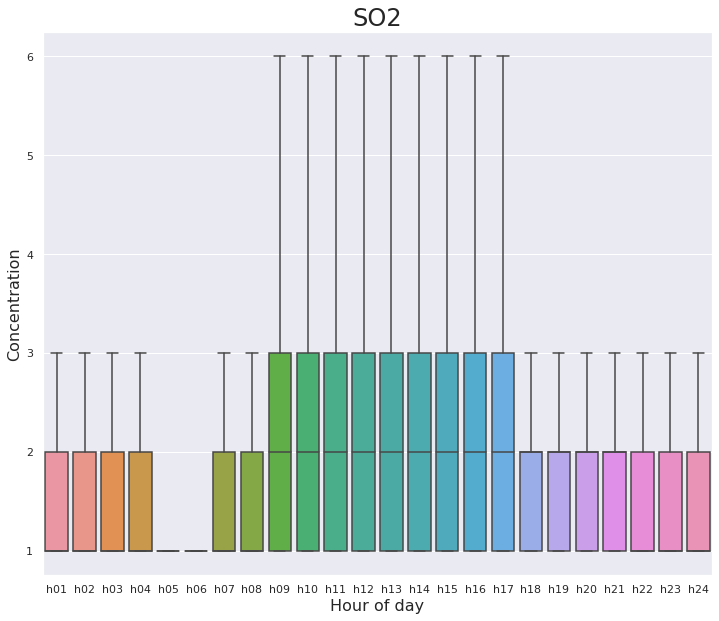

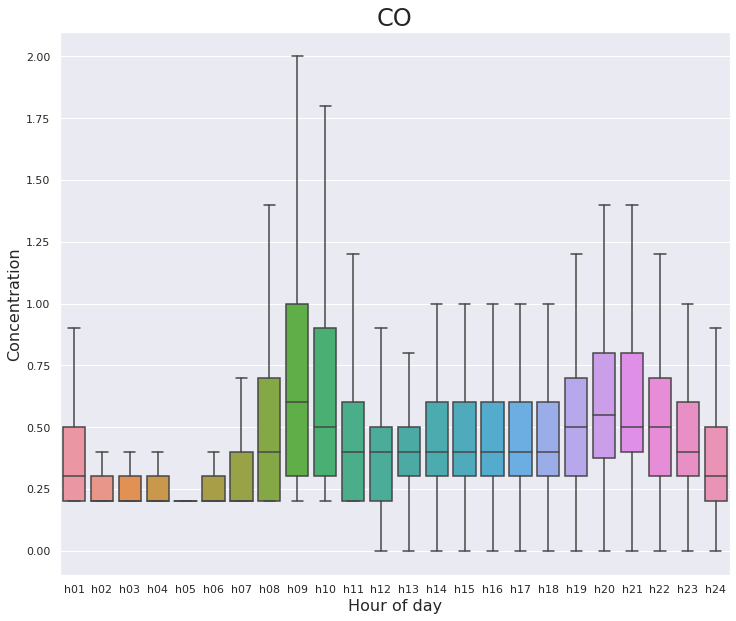

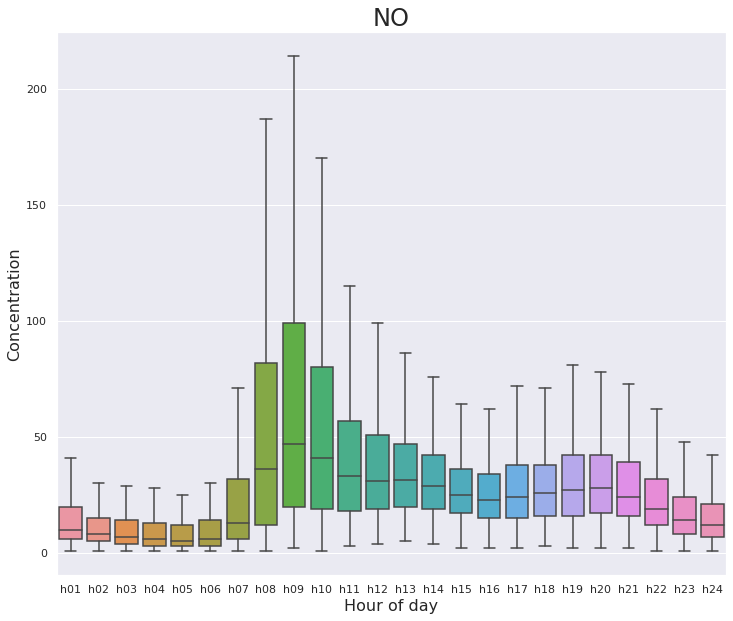

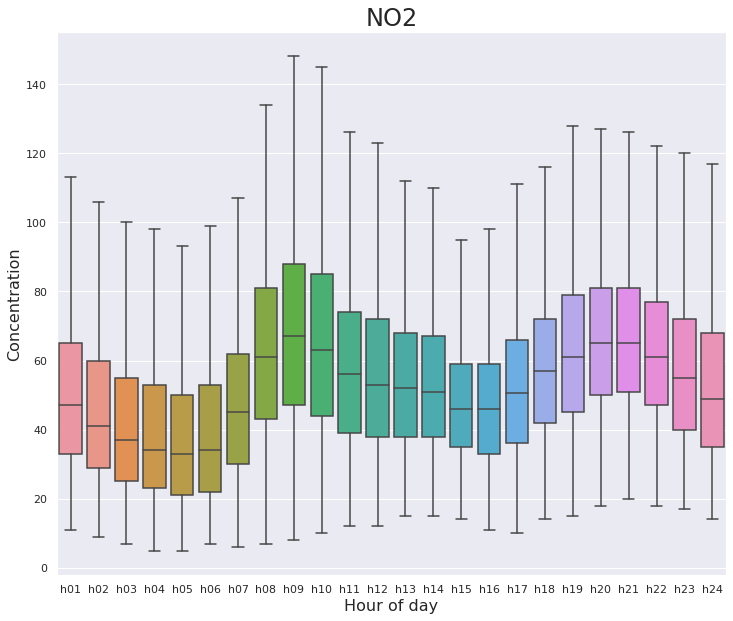

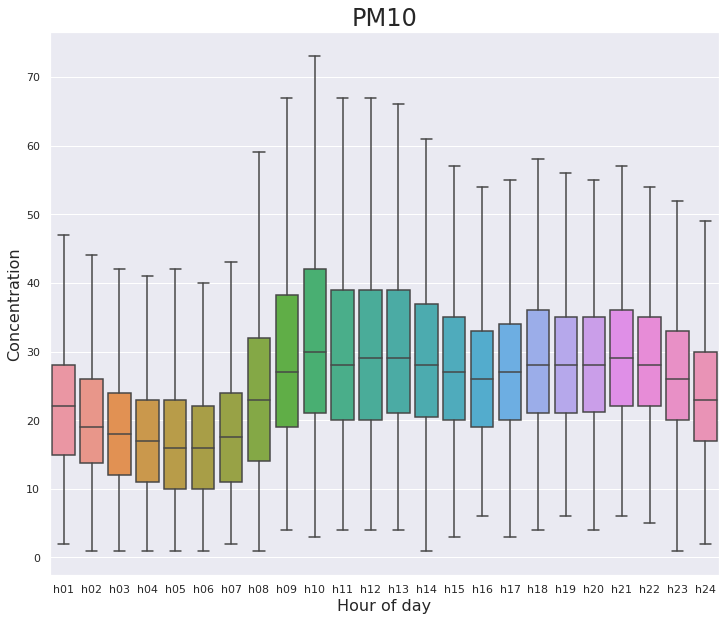

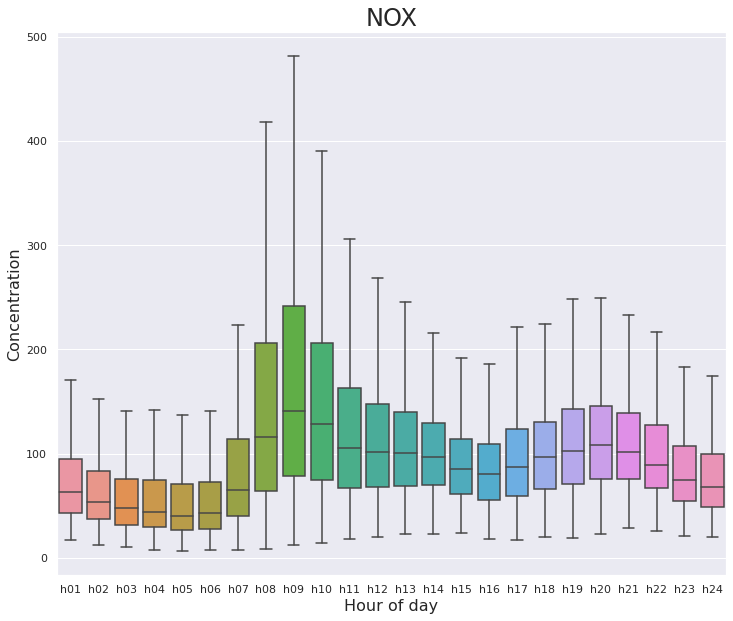

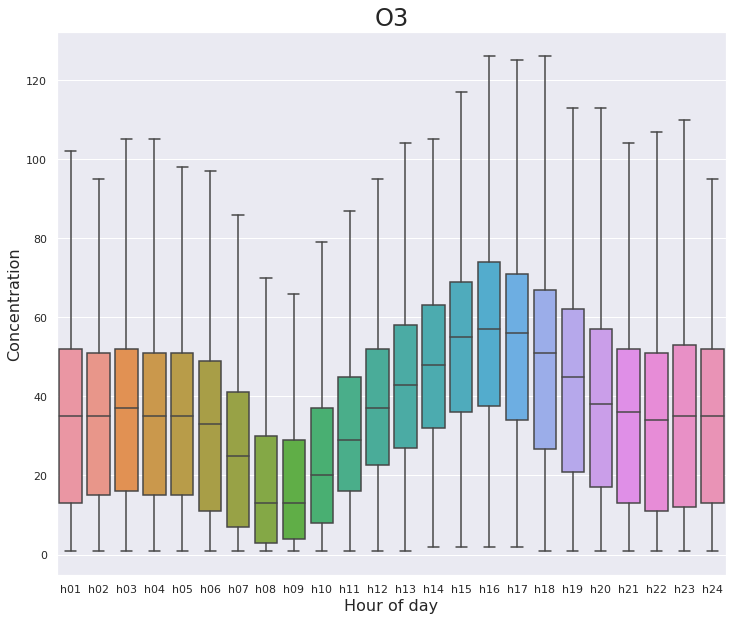

In [324]:
import seaborn as sns
import matplotlib.pyplot as plt
#dfContaminants[dfContaminants.contaminant=='PM10'].iloc[:,4:28]

fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='SO2')
                               & (dfContaminants.fecha < '2020-01-01')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("SO2", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='CO')
                               & (dfContaminants.fecha < '2020-01-01')].iloc[:,4:28]))
plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("CO", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='NO')
                               & (dfContaminants.fecha < '2020-01-01')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("NO", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='NO2')
                               & (dfContaminants.fecha < '2020-01-01')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("NO2", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='PM10')
                               & (dfContaminants.fecha < '2020-01-01')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("PM10", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='NOX')
                               & (dfContaminants.fecha < '2020-01-01')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("NOX", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='O3')
                               & (dfContaminants.fecha < '2020-01-01')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("O3", size=24)
plt.show()



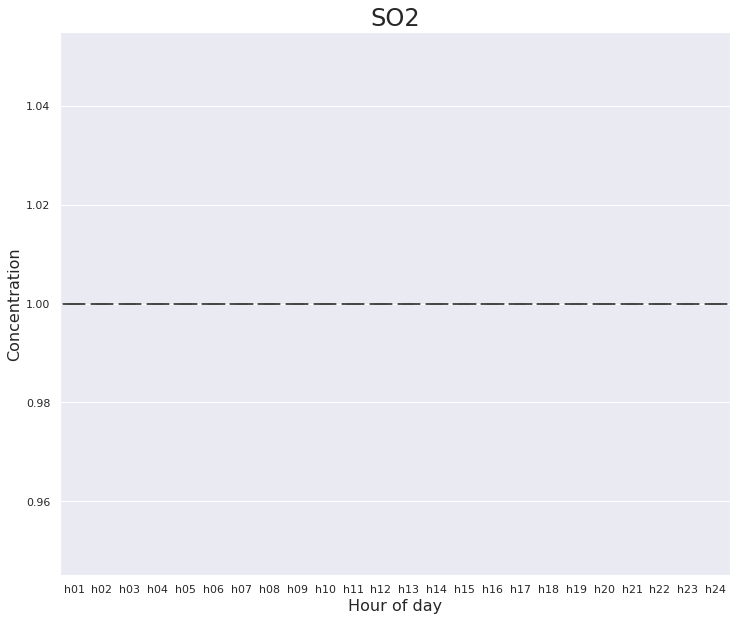

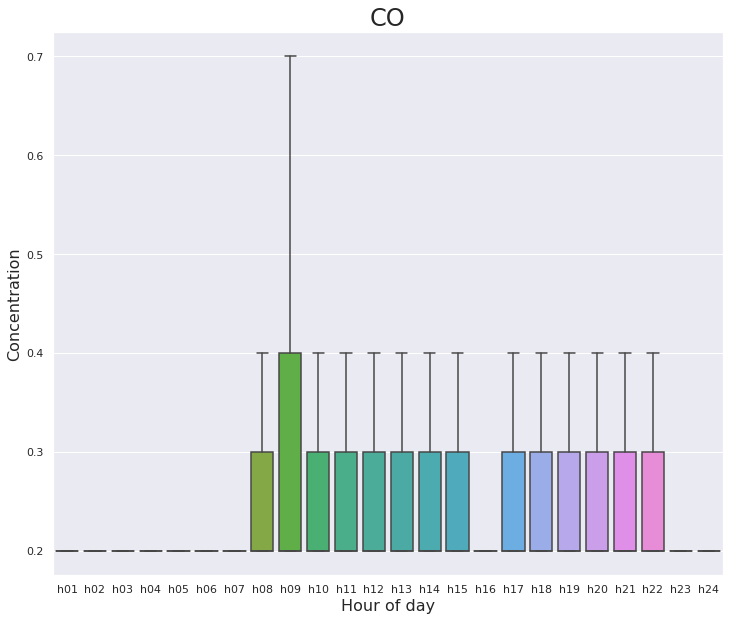

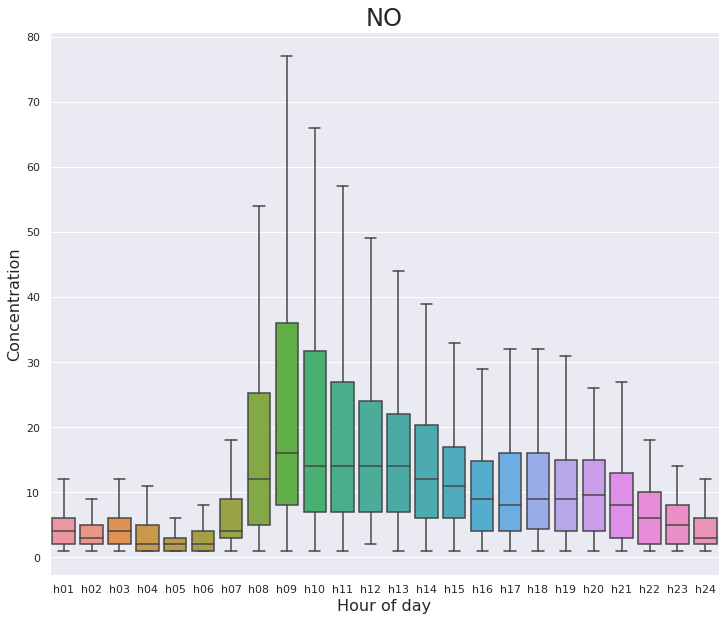

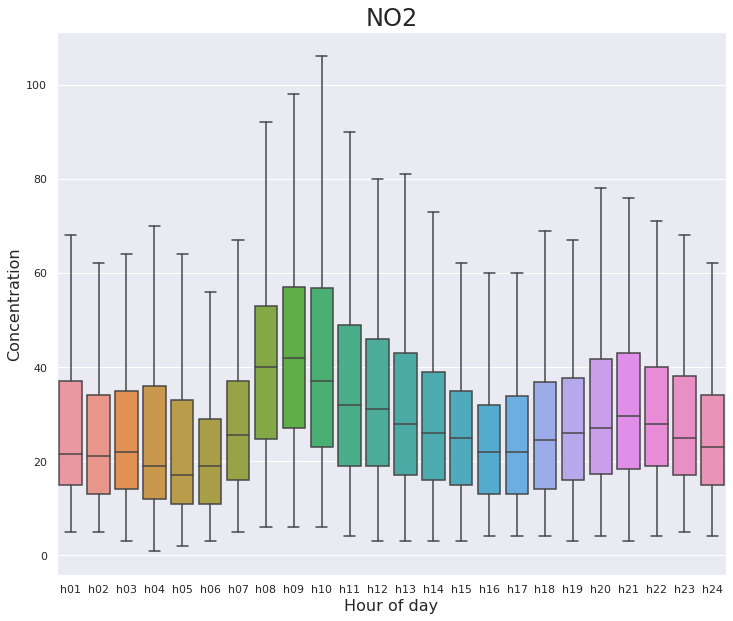

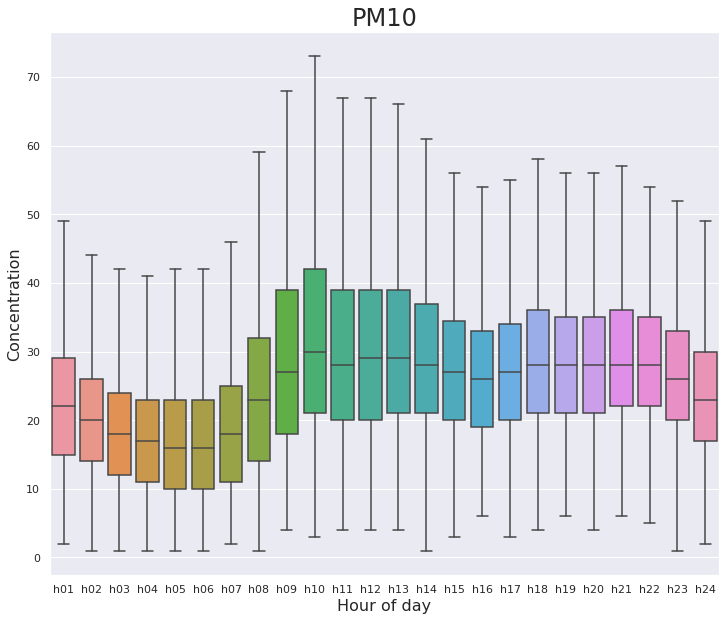

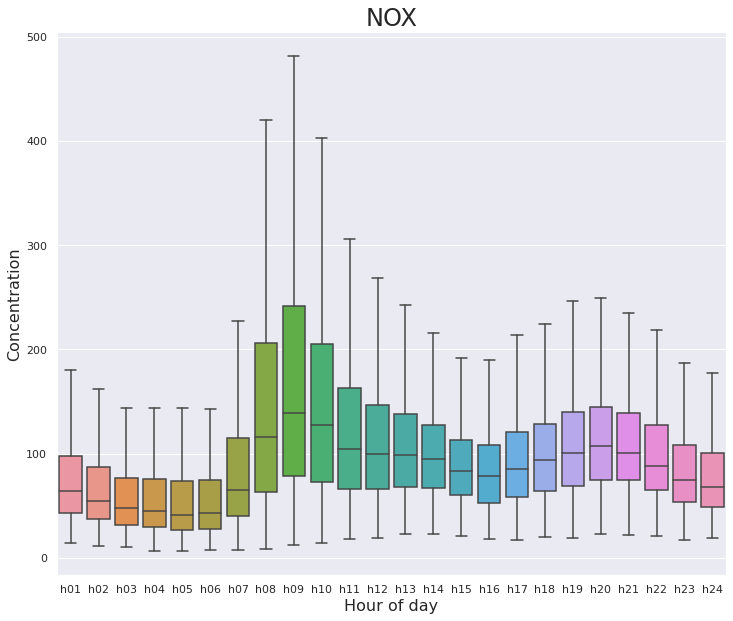

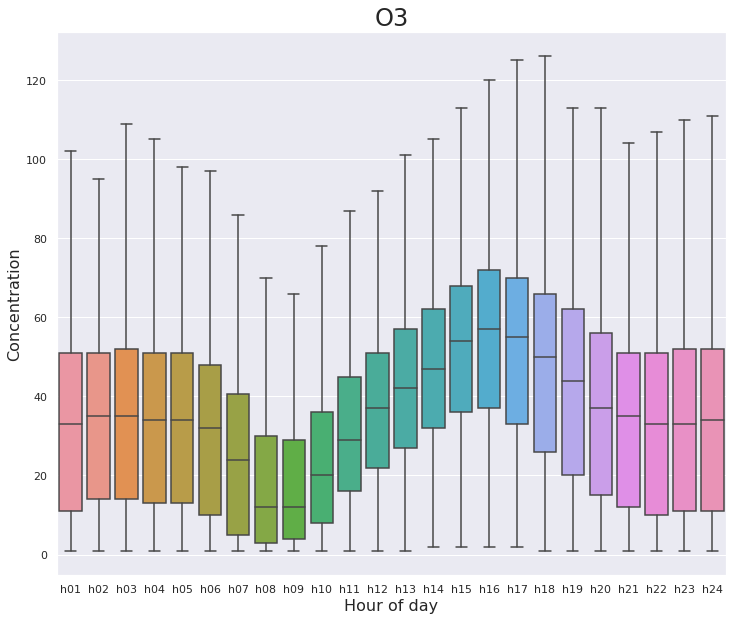

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt
#dfContaminants[dfContaminants.contaminant=='PM10'].iloc[:,4:28]

fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='SO2')
                               & (dfContaminants.fecha > '2020-03-15')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("SO2", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='CO')
                               & (dfContaminants.fecha > '2020-03-15')].iloc[:,4:28]))
plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("CO", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='NO')
                               & (dfContaminants.fecha > '2020-03-15')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("NO", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='NO2')
                               & (dfContaminants.fecha > '2020-03-15')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("NO2", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='PM10')
                               & (dfContaminants.fecha < '2020-03-15')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("PM10", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='NOX')
                               & (dfContaminants.fecha < '2020-03-15')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("NOX", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='O3')
                               & (dfContaminants.fecha < '2020-03-15')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("O3", size=24)
plt.show()

In [326]:
# Impute the null values by setting them to the average value for the hour of day for the contaminant for the station.

#stations = ['Barcelona (Eixample)', 'Barcelona (Sants)']
#pollutants = ['SO2','CO','NO','NO2','PM10','NOX','O3']
#data_columns = ['h01','h02','h03','h04','h05','h06','h07','h08','h09','h10','h11','h12']

stations = ['Barcelona (Eixample)']
pollutants = pollutants = ['SO2','CO','NO','NO2','PM10','NOX','O3']
data_columns = ['h01','h02','h03','h04','h05','h06','h07','h08','h09','h10','h11','h12', \
                'h13','h14','h15','h16','h17','h18','h19','h20','h21','h22','h23','h24']
dfContaminants2=dfContaminants.copy()

for i in range(len(stations)):
    for j in range(len(pollutants)):
        for column in data_columns:
            print(stations[i],pollutants[j], column)
            mask = (dfContaminants['nom_estacio']==stations[i]) & (dfContaminants['contaminant']==pollutants[j])
            mean = dfContaminants.loc[mask, column].mean()
            dfContaminants2.loc[mask, column] = dfContaminants.loc[mask, column].fillna(mean)
    



Barcelona (Eixample) SO2 h01
Barcelona (Eixample) SO2 h02
Barcelona (Eixample) SO2 h03
Barcelona (Eixample) SO2 h04
Barcelona (Eixample) SO2 h05
Barcelona (Eixample) SO2 h06
Barcelona (Eixample) SO2 h07
Barcelona (Eixample) SO2 h08
Barcelona (Eixample) SO2 h09
Barcelona (Eixample) SO2 h10
Barcelona (Eixample) SO2 h11
Barcelona (Eixample) SO2 h12
Barcelona (Eixample) SO2 h13
Barcelona (Eixample) SO2 h14
Barcelona (Eixample) SO2 h15
Barcelona (Eixample) SO2 h16
Barcelona (Eixample) SO2 h17
Barcelona (Eixample) SO2 h18
Barcelona (Eixample) SO2 h19
Barcelona (Eixample) SO2 h20
Barcelona (Eixample) SO2 h21
Barcelona (Eixample) SO2 h22
Barcelona (Eixample) SO2 h23
Barcelona (Eixample) SO2 h24
Barcelona (Eixample) CO h01
Barcelona (Eixample) CO h02
Barcelona (Eixample) CO h03
Barcelona (Eixample) CO h04
Barcelona (Eixample) CO h05
Barcelona (Eixample) CO h06
Barcelona (Eixample) CO h07
Barcelona (Eixample) CO h08
Barcelona (Eixample) CO h09
Barcelona (Eixample) CO h10
Barcelona (Eixample) CO 

In [327]:
dfContaminants2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9786 entries, 5560 to 1561
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   nom_estacio    9786 non-null   object        
 1   fecha          9786 non-null   datetime64[ns]
 2   contaminant    9786 non-null   object        
 3   tipus_estacio  9786 non-null   object        
 4   h01            9786 non-null   float64       
 5   h02            9786 non-null   float64       
 6   h03            9786 non-null   float64       
 7   h04            9786 non-null   float64       
 8   h05            9786 non-null   float64       
 9   h06            9786 non-null   float64       
 10  h07            9786 non-null   float64       
 11  h08            9786 non-null   float64       
 12  h09            9786 non-null   float64       
 13  h10            9786 non-null   float64       
 14  h11            9786 non-null   float64       
 15  h12            978

In [328]:
dfContaminants2.tail(100)

,nom_estacio,fecha,contaminant,tipus_estacio,h01,h02,h03,h04,h05,h06,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
1328,Barcelona (Eixample),2020-10-17,PM10,traffic,17.0,19.000000,19.0,20.0,21.0,21.0,...,24.0,24.0,18.0,15.0,21.0,20.0,24.0,33.0,35.0,28.0
1320,Barcelona (Eixample),2020-10-17,SO2,traffic,1.0,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0
1421,Barcelona (Eixample),2020-10-18,CO,traffic,0.2,0.297876,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
1427,Barcelona (Eixample),2020-10-18,NO,traffic,4.0,18.000000,12.0,39.0,12.0,24.0,...,10.0,4.0,7.0,8.0,10.0,4.0,3.0,3.0,6.0,11.0
1433,Barcelona (Eixample),2020-10-18,NO2,traffic,52.0,69.000000,62.0,70.0,60.0,61.0,...,19.0,12.0,14.0,24.0,37.0,40.0,62.0,73.0,68.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,Barcelona (Eixample),2020-10-31,NO2,traffic,59.0,55.000000,56.0,57.0,49.0,43.0,...,24.0,21.0,23.0,30.0,27.0,43.0,57.0,68.0,66.0,51.0
1565,Barcelona (Eixample),2020-10-31,NOX,traffic,228.0,198.000000,170.0,178.0,81.0,69.0,...,37.0,30.0,32.0,40.0,33.0,62.0,79.0,122.0,121.0,66.0
1572,Barcelona (Eixample),2020-10-31,O3,traffic,1.0,1.000000,1.0,2.0,1.0,1.0,...,62.0,67.0,67.0,54.0,50.0,29.0,13.0,4.0,3.0,12.0
1563,Barcelona (Eixample),2020-10-31,PM10,traffic,45.0,38.000000,33.0,35.0,28.0,25.0,...,30.0,29.0,32.0,29.0,28.0,26.0,30.0,36.0,44.0,31.0


In [329]:
dfMerged=dfContaminants2.merge(dfValidWeather, left_on='fecha', right_on='fecha')

In [330]:
dfMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9786 entries, 0 to 9785
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   nom_estacio    9786 non-null   object        
 1   fecha          9786 non-null   datetime64[ns]
 2   contaminant    9786 non-null   object        
 3   tipus_estacio  9786 non-null   object        
 4   h01            9786 non-null   float64       
 5   h02            9786 non-null   float64       
 6   h03            9786 non-null   float64       
 7   h04            9786 non-null   float64       
 8   h05            9786 non-null   float64       
 9   h06            9786 non-null   float64       
 10  h07            9786 non-null   float64       
 11  h08            9786 non-null   float64       
 12  h09            9786 non-null   float64       
 13  h10            9786 non-null   float64       
 14  h11            9786 non-null   float64       
 15  h12            9786 n

In [331]:
dfMerged.head(10)

,nom_estacio,fecha,contaminant,tipus_estacio,h01,h02,h03,h04,h05,h06,...,sol,tmax,tmed,tmin,velmedia,windDirComp,windDirSin,windDirCos,Date,WorkDayInd
0,Barcelona (Eixample),2017-01-01,NO,traffic,8.00000,11.000000,10.00000,8.000000,7.000000,19.000000,...,2.7,12.4,7.8,3.3,3.9,N,-2.449294e-16,1.000000,2017-01-01,0
1,Barcelona (Eixample),2017-01-01,NO2,traffic,51.00000,63.000000,53.00000,46.000000,45.000000,40.000000,...,2.7,12.4,7.8,3.3,3.9,N,-2.449294e-16,1.000000,2017-01-01,0
2,Barcelona (Eixample),2017-01-01,NOX,traffic,63.00000,79.000000,67.00000,59.000000,55.000000,69.000000,...,2.7,12.4,7.8,3.3,3.9,N,-2.449294e-16,1.000000,2017-01-01,0
3,Barcelona (Eixample),2017-01-01,O3,traffic,21.00000,16.000000,25.00000,29.000000,28.000000,33.000000,...,2.7,12.4,7.8,3.3,3.9,N,-2.449294e-16,1.000000,2017-01-01,0
4,Barcelona (Eixample),2017-01-01,SO2,traffic,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,...,2.7,12.4,7.8,3.3,3.9,N,-2.449294e-16,1.000000,2017-01-01,0
5,Barcelona (Eixample),2017-01-02,CO,traffic,0.35809,0.297876,0.26492,0.252215,0.241164,0.244364,...,4.8,14.3,8.6,2.8,5.3,SW,-6.427876e-01,-0.766044,2017-01-02,1
6,Barcelona (Eixample),2017-01-02,NO,traffic,2.00000,6.000000,7.00000,18.000000,15.000000,30.000000,...,4.8,14.3,8.6,2.8,5.3,SW,-6.427876e-01,-0.766044,2017-01-02,1
7,Barcelona (Eixample),2017-01-02,NO2,traffic,29.00000,41.000000,40.00000,45.000000,44.000000,49.000000,...,4.8,14.3,8.6,2.8,5.3,SW,-6.427876e-01,-0.766044,2017-01-02,1
8,Barcelona (Eixample),2017-01-02,NOX,traffic,33.00000,51.000000,50.00000,72.000000,66.000000,94.000000,...,4.8,14.3,8.6,2.8,5.3,SW,-6.427876e-01,-0.766044,2017-01-02,1
9,Barcelona (Eixample),2017-01-02,O3,traffic,44.00000,27.000000,18.00000,3.000000,9.000000,2.000000,...,4.8,14.3,8.6,2.8,5.3,SW,-6.427876e-01,-0.766044,2017-01-02,1


In [332]:
#  Add two calculated columns which are mean daily value and max daily value for each contaminant at each station
dfMerged['measurementMean'] = dfMerged[['h01','h02','h03','h04','h05','h06','h07','h08','h09','h10','h11','h12', \
                'h13','h14','h15','h16','h17','h18','h19','h20','h21','h22','h23','h24']].mean(axis=1)

dfMerged['measurementMax'] = dfMerged[['h01','h02','h03','h04','h05','h06','h07','h08','h09','h10','h11','h12', \
                'h13','h14','h15','h16','h17','h18','h19','h20','h21','h22','h23','h24']].max(axis=1)

In [333]:
dfMerged.head(10)

,nom_estacio,fecha,contaminant,tipus_estacio,h01,h02,h03,h04,h05,h06,...,tmed,tmin,velmedia,windDirComp,windDirSin,windDirCos,Date,WorkDayInd,measurementMean,measurementMax
0,Barcelona (Eixample),2017-01-01,NO,traffic,8.00000,11.000000,10.00000,8.000000,7.000000,19.000000,...,7.8,3.3,3.9,N,-2.449294e-16,1.000000,2017-01-01,0,15.208333,31.000000
1,Barcelona (Eixample),2017-01-01,NO2,traffic,51.00000,63.000000,53.00000,46.000000,45.000000,40.000000,...,7.8,3.3,3.9,N,-2.449294e-16,1.000000,2017-01-01,0,42.208333,70.000000
2,Barcelona (Eixample),2017-01-01,NOX,traffic,63.00000,79.000000,67.00000,59.000000,55.000000,69.000000,...,7.8,3.3,3.9,N,-2.449294e-16,1.000000,2017-01-01,0,65.125000,117.000000
3,Barcelona (Eixample),2017-01-01,O3,traffic,21.00000,16.000000,25.00000,29.000000,28.000000,33.000000,...,7.8,3.3,3.9,N,-2.449294e-16,1.000000,2017-01-01,0,27.333333,46.000000
4,Barcelona (Eixample),2017-01-01,SO2,traffic,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,...,7.8,3.3,3.9,N,-2.449294e-16,1.000000,2017-01-01,0,1.000000,1.000000
5,Barcelona (Eixample),2017-01-02,CO,traffic,0.35809,0.297876,0.26492,0.252215,0.241164,0.244364,...,8.6,2.8,5.3,SW,-6.427876e-01,-0.766044,2017-01-02,1,0.302450,0.680655
6,Barcelona (Eixample),2017-01-02,NO,traffic,2.00000,6.000000,7.00000,18.000000,15.000000,30.000000,...,8.6,2.8,5.3,SW,-6.427876e-01,-0.766044,2017-01-02,1,47.541667,216.000000
7,Barcelona (Eixample),2017-01-02,NO2,traffic,29.00000,41.000000,40.00000,45.000000,44.000000,49.000000,...,8.6,2.8,5.3,SW,-6.427876e-01,-0.766044,2017-01-02,1,60.958333,100.000000
8,Barcelona (Eixample),2017-01-02,NOX,traffic,33.00000,51.000000,50.00000,72.000000,66.000000,94.000000,...,8.6,2.8,5.3,SW,-6.427876e-01,-0.766044,2017-01-02,1,133.333333,431.000000
9,Barcelona (Eixample),2017-01-02,O3,traffic,44.00000,27.000000,18.00000,3.000000,9.000000,2.000000,...,8.6,2.8,5.3,SW,-6.427876e-01,-0.766044,2017-01-02,1,15.000000,44.000000


In [334]:
# remove the hourly columns now - we will make do with daily mean and max values
dfAirQuality=dfMerged.drop(['h01','h02','h03','h04','h05','h06','h07','h08','h09','h10','h11','h12',\
                          'h13','h14','h15','h16','h17','h18','h19','h20','h21','h22','h23','h24'], axis=1)

In [335]:
### Correlations between variables
# We will correlate for each contaminant the variables      
#  measurementMean
#  measurementMax
# dir              
#  prec      
#  presMax     
#  presMin   
#  racha       
#  sol          
#  tmax      
#  tmed        
#  tmin    
#  velmedia   
#  windDirComp      
#  windDirSin      
#  windDirCos    
#  WorkDayInd

dfToCorrelate=dfAirQuality[['measurementMean','measurementMax','tmax','tmed','tmin','racha','velmedia',\
                            'windDirSin',\
                            'windDirCos','windDirComp','sol',\
                            'contaminant','prec','presMax','presMin',\
                            'WorkDayInd']]
dfToCorrelate=dfToCorrelate[(dfToCorrelate.contaminant=='NO2')]
corr=dfToCorrelate.corr()
print(corr)



                 measurementMean  measurementMax      tmax      tmed  \
measurementMean         1.000000        0.907032 -0.040726 -0.077858   
measurementMax          0.907032        1.000000 -0.003671 -0.050976   
tmax                   -0.040726       -0.003671  1.000000  0.985218   
tmed                   -0.077858       -0.050976  0.985218  1.000000   
tmin                   -0.109523       -0.092656  0.946411  0.987715   
racha                  -0.272801       -0.224127 -0.149664 -0.136654   
velmedia               -0.281201       -0.235796 -0.035997 -0.016503   
windDirSin             -0.004151       -0.025368  0.060278  0.099727   
windDirCos              0.012742       -0.002069 -0.338257 -0.347803   
sol                     0.017647        0.096327  0.489856  0.424255   
prec                   -0.093673       -0.111200 -0.060115 -0.026044   
presMax                 0.162961        0.144106 -0.166733 -0.197653   
presMin                 0.191156        0.165651 -0.019732 -0.04

<AxesSubplot:>

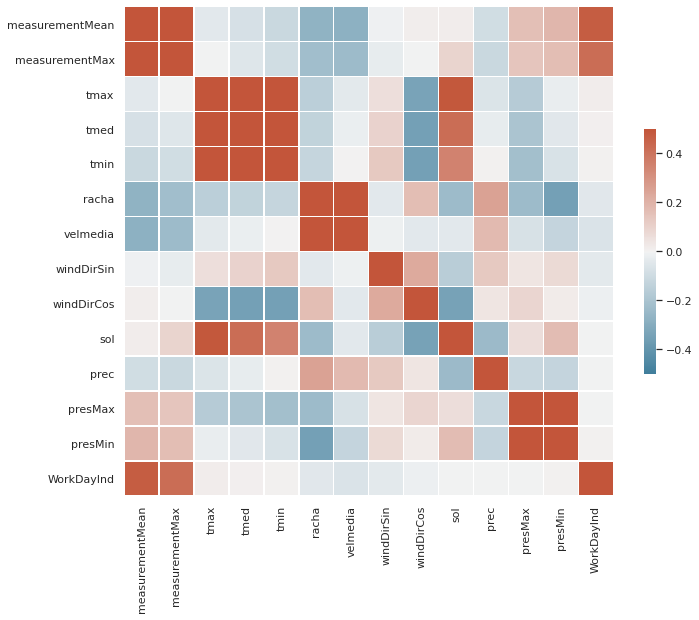

In [336]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})

sns.heatmap(corr, cmap=cmap, vmax=.5, vmin=-0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [337]:
# Now repeat within date range from 15 Mar 2020 onwards (start of lockdown)


dfToCorrelate=dfAirQuality[['measurementMean','measurementMax','tmax','tmed','tmin','racha','velmedia',\
                            'windDirSin',\
                            'windDirCos','windDirComp','sol',\
                            'contaminant','prec','presMax','presMin',\
                            'WorkDayInd','fecha']]
dfToCorrelate=dfToCorrelate[(dfToCorrelate.contaminant=='NO2')&(dfToCorrelate.fecha>'2020-03-15')
                           &(dfToCorrelate.fecha<'2020-06-21')]
corr=dfToCorrelate.corr()
print(corr)

                 measurementMean  measurementMax      tmax      tmed  \
measurementMean         1.000000        0.866863  0.448588  0.382298   
measurementMax          0.866863        1.000000  0.343406  0.267411   
tmax                    0.448588        0.343406  1.000000  0.954093   
tmed                    0.382298        0.267411  0.954093  1.000000   
tmin                    0.275304        0.161531  0.812068  0.949494   
racha                  -0.413874       -0.376291 -0.246613 -0.169823   
velmedia               -0.380608       -0.348322 -0.311389 -0.237215   
windDirSin             -0.276454       -0.277400 -0.489643 -0.382937   
windDirCos             -0.157769       -0.181946 -0.194848 -0.158519   
sol                     0.366301        0.393552  0.597175  0.434713   
prec                   -0.183758       -0.212897 -0.291574 -0.141812   
presMax                 0.243976        0.363273  0.024592 -0.019439   
presMin                 0.278992        0.368430  0.031956 -0.02

<AxesSubplot:>

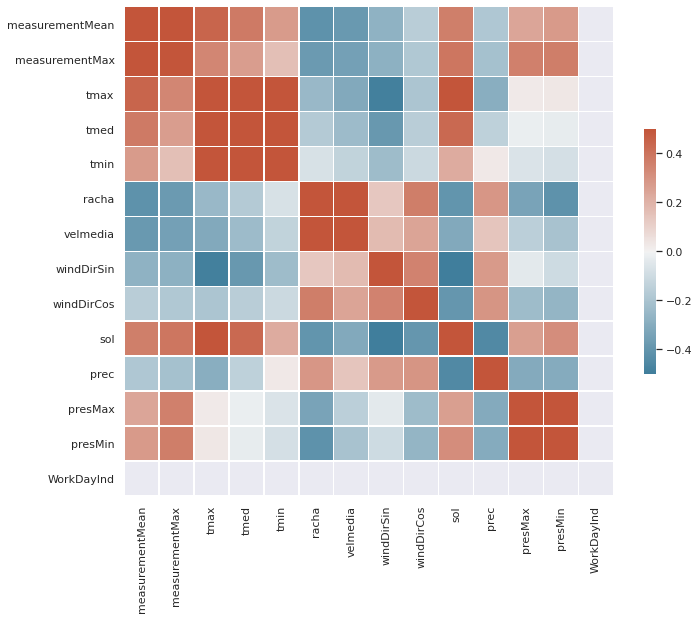

In [338]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})

sns.heatmap(corr, cmap=cmap, vmax=.5, vmin=-0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [339]:
# Now repeat within date range from 22 Jun 2020 onwards (end of lockdown)


dfToCorrelate=dfAirQuality[['measurementMean','measurementMax','tmax','tmed','tmin','racha','velmedia',\
                            'windDirSin',\
                            'windDirCos','windDirComp','sol',\
                            'contaminant','prec','presMax','presMin',\
                            'WorkDayInd','fecha']]
dfToCorrelate=dfToCorrelate[(dfToCorrelate.contaminant=='NO2')&(dfToCorrelate.fecha>'2020-06-21')]
corr=dfToCorrelate.corr()
print(corr)

                 measurementMean  measurementMax      tmax      tmed  \
measurementMean         1.000000        0.891812 -0.156341 -0.182896   
measurementMax          0.891812        1.000000 -0.171319 -0.196266   
tmax                   -0.156341       -0.171319  1.000000  0.978889   
tmed                   -0.182896       -0.196266  0.978889  1.000000   
tmin                   -0.199035       -0.211213  0.935880  0.988078   
racha                  -0.341592       -0.311654 -0.288032 -0.310038   
velmedia               -0.168401       -0.176392 -0.116561 -0.144835   
windDirSin              0.066695        0.098911  0.156105  0.168864   
windDirCos             -0.070852       -0.018791 -0.472246 -0.466350   
sol                    -0.248511       -0.198681  0.405416  0.340064   
prec                   -0.018575       -0.086327  0.006987 -0.011577   
presMax                 0.327718        0.218011 -0.137767 -0.143587   
presMin                 0.335957        0.197730  0.074060  0.07

<AxesSubplot:>

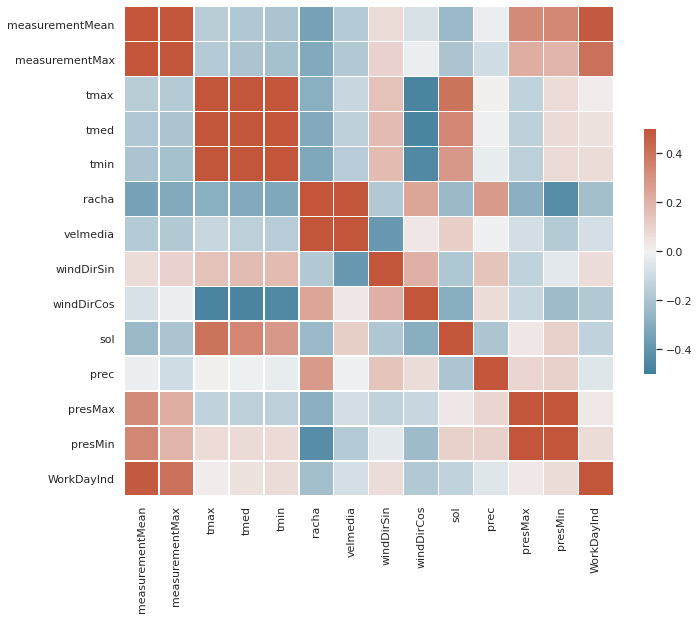

In [340]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})

sns.heatmap(corr, cmap=cmap, vmax=.5, vmin=-0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [341]:
# now normalize the data for NO2

dfNO2 = dfAirQuality.copy()
dfNO2=dfNO2[(dfNO2.contaminant=='NO2')]

cols_to_norm = ['measurementMean','measurementMax','tmax','tmed','tmin','racha','velmedia',\
                'windDirSin','windDirCos','sol','prec','presMax','presMin']
dfNO2[cols_to_norm] = dfNO2[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))




In [342]:
dfNO2.describe()

,dir,prec,presMax,presMin,racha,sol,tmax,tmed,tmin,velmedia,windDirSin,windDirCos,WorkDayInd,measurementMean,measurementMax
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,19.367857,0.022358,0.726251,0.705242,0.203642,0.526548,0.522571,0.502160,0.518162,0.181514,0.454558,0.481532,0.631429,0.356217,0.357594
std,10.324871,0.093884,0.095916,0.107734,0.124730,0.287213,0.182434,0.209734,0.228750,0.092634,0.351316,0.352631,0.482590,0.152800,0.145605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.674663,0.657914,0.130952,0.318182,0.369906,0.324042,0.322581,0.125714,0.116978,0.116978,0.000000,0.255018,0.256545
50%,22.000000,0.000000,0.722639,0.711538,0.162698,0.564394,0.509404,0.480836,0.501792,0.160000,0.413176,0.413176,1.000000,0.353405,0.350785
75%,26.000000,0.000569,0.779610,0.766272,0.273810,0.772727,0.683386,0.686411,0.720430,0.222857,0.821394,0.883022,1.000000,0.445341,0.439791
max,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [343]:
dfNO2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 1 to 9781
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   nom_estacio      1400 non-null   object        
 1   fecha            1400 non-null   datetime64[ns]
 2   contaminant      1400 non-null   object        
 3   tipus_estacio    1400 non-null   object        
 4   dir              1400 non-null   float64       
 5   prec             1400 non-null   float64       
 6   presMax          1400 non-null   float64       
 7   presMin          1400 non-null   float64       
 8   racha            1400 non-null   float64       
 9   sol              1400 non-null   float64       
 10  tmax             1400 non-null   float64       
 11  tmed             1400 non-null   float64       
 12  tmin             1400 non-null   float64       
 13  velmedia         1400 non-null   float64       
 14  windDirComp      1400 non-null   object 

In [362]:
dfNO2.head(10)

X_columns = dfNO2[["measurementMax","prec","presMax","presMin","racha","velmedia","sol","tmax","tmed","tmin",\
                  "windDirSin","windDirCos"]]
#Time series X leads output Y by 1 day

X=X_columns.copy().reset_index(drop=True)
# Create Y as measurementMax value with first row removed
X.head()
y=X["measurementMax"].drop(X.index[0])
# Remove last row from X
X=X.drop(X.index[-1])
X.tail()
# We are predicting the values on the day of set Y, so working Day needs to be brought forward also
workingDay=dfNO2["WorkDayInd"]
workingDay.head()
workingDay=workingDay.drop(workingDay.index[0]).reset_index(drop=True)
# T to transpose the series into DF column
dfwd = pd.DataFrame([workingDay]).T
dfwd.tail()# combine working Day as input concatenated to X
X=pd.concat([X,dfwd], axis=1)
print(y)
print(X)

1       0.439791
2       0.408377
3       0.356021
4       0.319372
5       0.387435
          ...   
1395    0.303665
1396    0.460733
1397    0.387435
1398    0.314136
1399    0.272251
Name: measurementMax, Length: 1399, dtype: float64
      measurementMax  prec   presMax   presMin     racha  velmedia       sol  \
0           0.282723   0.0  0.880060  0.826923  0.273810  0.142857  0.204545   
1           0.439791   0.0  0.791604  0.791420  0.186508  0.222857  0.363636   
2           0.408377   0.0  0.808096  0.801775  0.206349  0.205714  0.303030   
3           0.356021   0.0  0.803598  0.781065  0.130952  0.142857  0.393939   
4           0.319372   0.0  0.839580  0.779586  0.186508  0.142857  0.348485   
...              ...   ...       ...       ...       ...       ...       ...   
1394        0.209034   0.0  0.671664  0.582840  0.162698  0.160000  0.530303   
1395        0.303665   0.0  0.700150  0.710059  0.130952  0.080000  0.439394   
1396        0.460733   0.0  0.793103  0.74

In [363]:
# Split into Test and Train
# Times series data so we don't shuffle them
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test  = model_selection.train_test_split(X,y, test_size=0.2, random_state=42, shuffle=False)

In [364]:
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print("X_test: ", X_test)
print ("y_test: ", y_test)

X_train:        measurementMax      prec   presMax   presMin     racha  velmedia  \
0           0.282723  0.000000  0.880060  0.826923  0.273810  0.142857   
1           0.439791  0.000000  0.791604  0.791420  0.186508  0.222857   
2           0.408377  0.000000  0.808096  0.801775  0.206349  0.205714   
3           0.356021  0.000000  0.803598  0.781065  0.130952  0.142857   
4           0.319372  0.000000  0.839580  0.779586  0.186508  0.142857   
...              ...       ...       ...       ...       ...       ...   
1114        0.136126  0.615472  0.841079  0.823964  0.757937  0.874286   
1115        0.115183  1.000000  0.824588  0.798817  0.936508  1.000000   
1116        0.366492  0.118316  0.778111  0.766272  0.448413  0.382857   
1117        0.376963  0.001138  0.793103  0.739645  0.416667  0.080000   
1118        0.429319  0.000000  0.791604  0.786982  0.142857  0.160000   

           sol      tmax      tmed      tmin  windDirSin  windDirCos  \
0     0.204545  0.228840  0.1

In [407]:
#  Apply the model
from sklearn import svm
from sklearn.metrics import mean_squared_error
from math import sqrt

type = "nu-regression"
kernel = "rbf"

#model = svm(x = X_train, y = Y_train, type = type, kernel = kernel)

#clf = svm.SVR(kernel=kernel, verbose=True, gamma=0.3, epsilon=0.05, C=2) # Radial Kernel
#clf = svm.SVR(kernel=kernel, verbose=True, gamma=0.25, epsilon=0.043, C=2) # Radial Kernel


clf = svm.SVR(kernel=kernel, verbose=True, gamma=0.005, epsilon=0.009, C=96) # Radial Kernel

#Train the model using the training sets
svr=clf.fit(X_train, y_train)

print(svr)

#Predict the response for test dataset
y_pred = svr.predict(X_test)


print("1 day RMSE:", sqrt(mean_squared_error(y_test, y_pred)))




[LibSVM]SVR(C=96, epsilon=0.009, gamma=0.005, verbose=True)
1 day RMSE: 0.10991196290830342


In [408]:
# Need to explain why R-squared=1.0

dfNO2=dfNO2[(dfNO2.contaminant=='NO2')]
maxValue=dfAirQuality["measurementMax"][(dfAirQuality.contaminant=='NO2')].max()
minValue=dfAirQuality["measurementMax"][(dfAirQuality.contaminant=='NO2')].min()
#minValue=dfAirQuality["measurementMax"].min()
print(maxValue)
print(minValue)

207.0
16.0


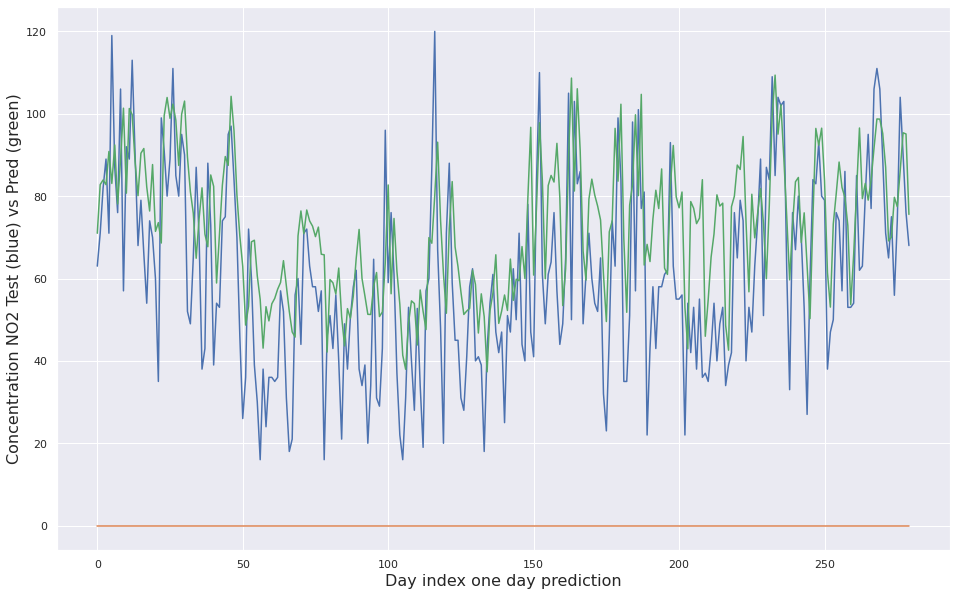

In [409]:


y_pred_1 = (y_pred * (maxValue - minValue)) + minValue
y_test_1 = (y_test * (maxValue - minValue)) + minValue



#Plot the two data sets

sns.set(rc={'figure.figsize':(16,10)})
df = pd.DataFrame(y_pred_1).melt()
df2 = pd.DataFrame(y_test_1).melt()
df2.drop(["variable"],axis=1)
df3=df2["value"]

df3.head()
plt.plot(df3)
plt.plot(df)

plt.title("Test vs Predicted denormalized NO2 one day lag")
plt.xlabel("Day index one day prediction", size=16)
plt.ylabel("Concentration NO2 Test (blue) vs Pred (green)", size=16)
plt.title("", size=24)
plt.show()

# Test is blue
# Pred is green




In [410]:
#print(y_test[-60:])

print("1 day RMSE:", sqrt(mean_squared_error(y_test[-60:], y_pred[-60:])))

1 day RMSE: 0.08470996843893315


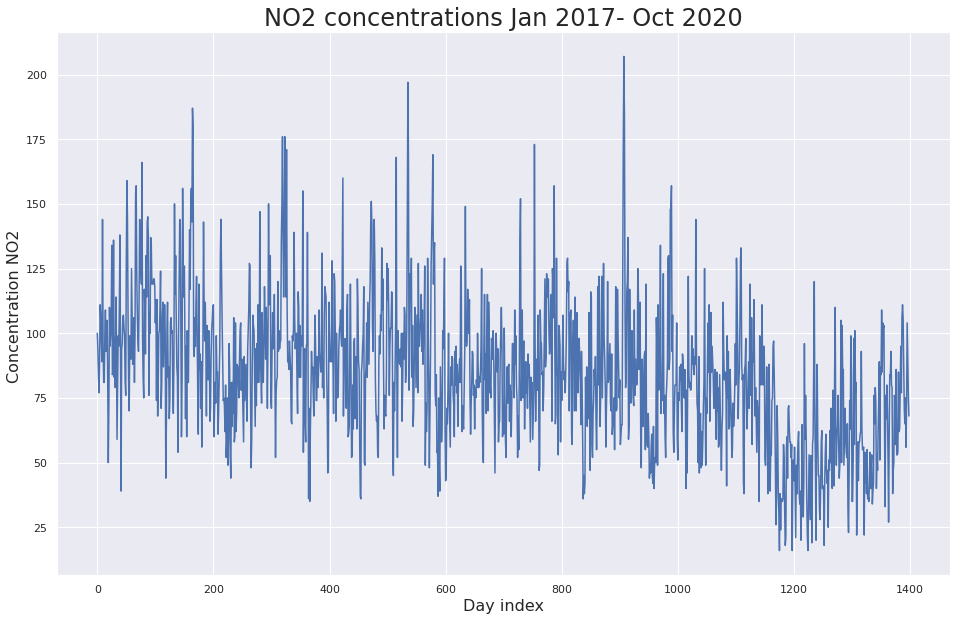

In [412]:


y_pred_1 = (y_pred * (maxValue - minValue)) + minValue
y_test_1 = (y * (maxValue - minValue)) + minValue



#Plot the two data sets

sns.set(rc={'figure.figsize':(16,10)})
df = pd.DataFrame(y_pred_1).melt()
df2 = pd.DataFrame(y_test_1).melt()
df2.drop(["variable"],axis=1)
df3=df2["value"]

df3.head()
plt.plot(df3)
#plt.plot(df)

plt.title("NO2 concentrations Jan 2017- Oct 2020", size=24)
plt.xlabel("Day index", size=16)
plt.ylabel("Concentration NO2 ", size=16)
#plt.title("", size=24)
plt.show()

# Test is blue
# Pred is green

In [351]:
dfNO2.head(10)

X_columns = dfNO2[["measurementMax","prec","presMax","presMin","racha","velmedia","sol","tmax","tmed","tmin",\
                  "windDirSin","windDirCos"]]
#Time series X leads output Y by 1 day

X=X_columns.copy().reset_index(drop=True)
# Create Y as measurementMax value with first row removed
X.head()
y=X["measurementMax"].drop(X.index[[0,1]])
# Remove last row from X
X=X.drop(X.index[[-1,-2]])
X.tail()
# We are predicting the values on the day of set Y, so working Day needs to be brought forward also
workingDay=dfNO2["WorkDayInd"]
workingDay.head()
workingDay=workingDay.drop(workingDay.index[[0,1]]).reset_index(drop=True)
# T to transpose the series into DF column
dfwd = pd.DataFrame([workingDay]).T
dfwd.tail()# combine working Day as input concatenated to X
X=pd.concat([X,dfwd], axis=1)
print(y)
print(X)
# Split into Test and Train
# Times series data so we don't shuffle them
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test  = model_selection.train_test_split(X,y, test_size=0.2, random_state=42, shuffle=False)




2       0.408377
3       0.356021
4       0.319372
5       0.387435
6       0.497382
          ...   
1395    0.303665
1396    0.460733
1397    0.387435
1398    0.314136
1399    0.272251
Name: measurementMax, Length: 1398, dtype: float64
      measurementMax      prec   presMax   presMin     racha  velmedia  \
0           0.282723  0.000000  0.880060  0.826923  0.273810  0.142857   
1           0.439791  0.000000  0.791604  0.791420  0.186508  0.222857   
2           0.408377  0.000000  0.808096  0.801775  0.206349  0.205714   
3           0.356021  0.000000  0.803598  0.781065  0.130952  0.142857   
4           0.319372  0.000000  0.839580  0.779586  0.186508  0.142857   
...              ...       ...       ...       ...       ...       ...   
1393        0.308901  0.001138  0.703148  0.594675  0.242063  0.142857   
1394        0.209034  0.000000  0.671664  0.582840  0.162698  0.160000   
1395        0.303665  0.000000  0.700150  0.710059  0.130952  0.080000   
1396        0.460733  

In [352]:
#  Apply the model
from sklearn import svm
from sklearn.metrics import mean_squared_error
from math import sqrt

type = "nu-regression"
kernel = "rbf"

#model = svm(x = X_train, y = Y_train, type = type, kernel = kernel)

clf = svm.SVR(kernel=kernel, verbose=True, gamma=0.25, epsilon=0.043, C=2) # Linear Kernel

#Train the model using the training sets
svr=clf.fit(X_train, y_train)

print(svr)

#Predict the response for test dataset
y_pred = svr.predict(X_test)


print("2 days RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print("2 days RMSE:", sqrt(mean_squared_error(y_test[-60:], y_pred[-60:])))



[LibSVM]SVR(C=2, epsilon=0.043, gamma=0.25, verbose=True)
2 days RMSE: 0.12352253770871148
2 days RMSE: 0.1035956257164794


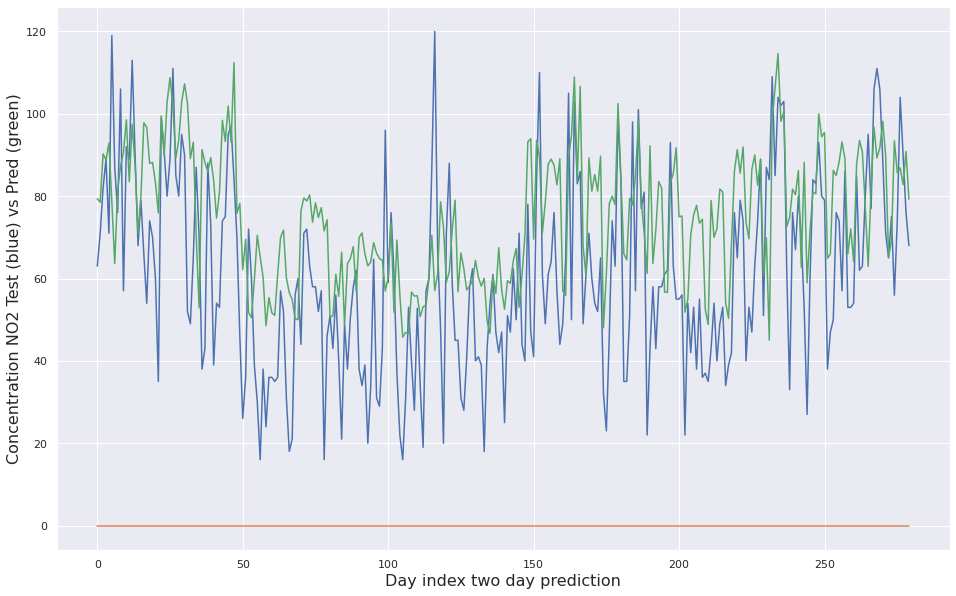

In [353]:


y_pred_1 = (y_pred * (maxValue - minValue)) + minValue
y_test_1 = (y_test * (maxValue - minValue)) + minValue



#Plot the two data sets

sns.set(rc={'figure.figsize':(16,10)})
df = pd.DataFrame(y_pred_1).melt()
df2 = pd.DataFrame(y_test_1).melt()
df2.drop(["variable"],axis=1)
df3=df2["value"]

df3.head()
plt.plot(df3)
plt.plot(df)

plt.title("Test vs Predicted denormalized NO2 one day lag")
plt.xlabel("Day index two day prediction", size=16)
plt.ylabel("Concentration NO2 Test (blue) vs Pred (green)", size=16)
plt.title("", size=24)
plt.show()

# Test is blue
# Pred is green


In [354]:
dfNO2.head(10)

X_columns = dfNO2[["measurementMax","prec","presMax","presMin","racha","velmedia","sol","tmax","tmed","tmin",\
                  "windDirSin","windDirCos"]]
#Time series X leads output Y by 1 day

X=X_columns.copy().reset_index(drop=True)
# Create Y as measurementMax value with first row removed
X.head()
y=X["measurementMax"].drop(X.index[[0,1,2]])
# Remove last row from X
X=X.drop(X.index[[-1,-2,-3]])
X.tail()
# We are predicting the values on the day of set Y, so working Day needs to be brought forward also
workingDay=dfNO2["WorkDayInd"]
workingDay.head()
workingDay=workingDay.drop(workingDay.index[[0,1,2]]).reset_index(drop=True)
# T to transpose the series into DF column
dfwd = pd.DataFrame([workingDay]).T
dfwd.tail()# combine working Day as input concatenated to X
X=pd.concat([X,dfwd], axis=1)
print(y)
print(X)
# Split into Test and Train
# Times series data so we don't shuffle them
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test  = model_selection.train_test_split(X,y, test_size=0.2, random_state=42, shuffle=False)




3       0.356021
4       0.319372
5       0.387435
6       0.497382
7       0.465969
          ...   
1395    0.303665
1396    0.460733
1397    0.387435
1398    0.314136
1399    0.272251
Name: measurementMax, Length: 1397, dtype: float64
      measurementMax      prec   presMax   presMin     racha  velmedia  \
0           0.282723  0.000000  0.880060  0.826923  0.273810  0.142857   
1           0.439791  0.000000  0.791604  0.791420  0.186508  0.222857   
2           0.408377  0.000000  0.808096  0.801775  0.206349  0.205714   
3           0.356021  0.000000  0.803598  0.781065  0.130952  0.142857   
4           0.319372  0.000000  0.839580  0.779586  0.186508  0.142857   
...              ...       ...       ...       ...       ...       ...   
1392        0.256545  0.000000  0.784108  0.751479  0.230159  0.268571   
1393        0.308901  0.001138  0.703148  0.594675  0.242063  0.142857   
1394        0.209034  0.000000  0.671664  0.582840  0.162698  0.160000   
1395        0.303665  

In [355]:
#  Apply the model
from sklearn import svm
from sklearn.metrics import mean_squared_error
from math import sqrt

type = "nu-regression"
kernel = "rbf"

#model = svm(x = X_train, y = Y_train, type = type, kernel = kernel)

clf = svm.SVR(kernel=kernel, verbose=True, gamma=0.25, epsilon=0.043, C=2) # Linear Kernel

#Train the model using the training sets
svr=clf.fit(X_train, y_train)

print(svr)

#Predict the response for test dataset
y_pred = svr.predict(X_test)


print("3 days RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print("3 days RMSE:", sqrt(mean_squared_error(y_test[-60:], y_pred[-60:])))


[LibSVM]SVR(C=2, epsilon=0.043, gamma=0.25, verbose=True)
3 days RMSE: 0.13006473837531526
3 days RMSE: 0.1028537129547561


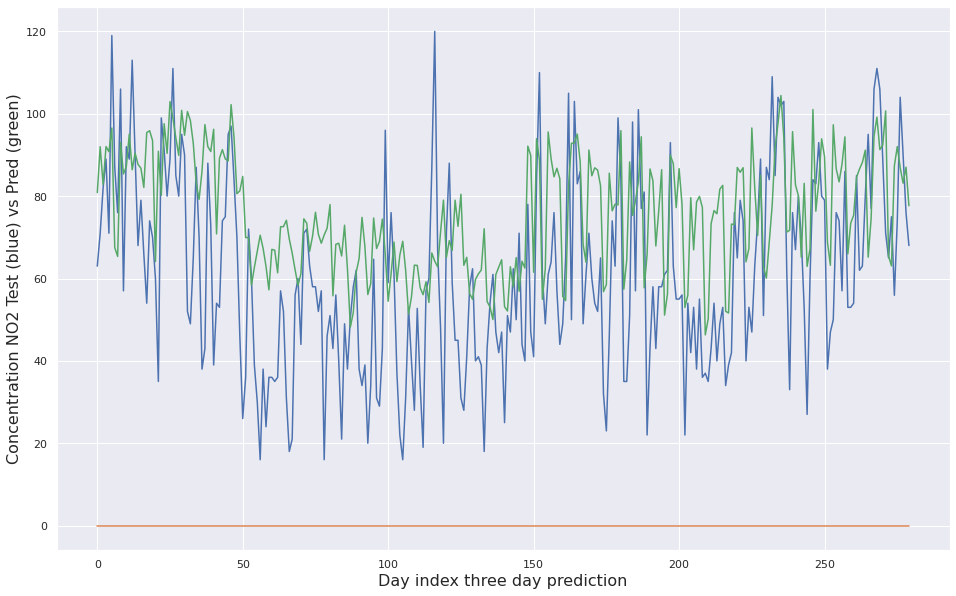

In [356]:


y_pred_1 = (y_pred * (maxValue - minValue)) + minValue
y_test_1 = (y_test * (maxValue - minValue)) + minValue



#Plot the two data sets

sns.set(rc={'figure.figsize':(16,10)})
df = pd.DataFrame(y_pred_1).melt()
df2 = pd.DataFrame(y_test_1).melt()
df2.drop(["variable"],axis=1)
df3=df2["value"]

df3.head()
plt.plot(df3)
plt.plot(df)

plt.title("Test vs Predicted denormalized NO2 one day lag")
plt.xlabel("Day index three day prediction", size=16)
plt.ylabel("Concentration NO2 Test (blue) vs Pred (green)", size=16)
plt.title("", size=24)
plt.show()

# Test is blue
# Pred is green


In [357]:
dfNO2.head(10)

X_columns = dfNO2[["measurementMax","prec","presMax","presMin","racha","velmedia","sol","tmax","tmed","tmin",\
                  "windDirSin","windDirCos"]]
#Time series X leads output Y by 1 day

X=X_columns.copy().reset_index(drop=True)
# Create Y as measurementMax value with first row removed
X.head()
y=X["measurementMax"].drop(X.index[[0,1,2,3]])
# Remove last row from X
X=X.drop(X.index[[-1,-2,-3,-4]])
X.tail()
# We are predicting the values on the day of set Y, so working Day needs to be brought forward also
workingDay=dfNO2["WorkDayInd"]
workingDay.head()
workingDay=workingDay.drop(workingDay.index[[0,1,2,3]]).reset_index(drop=True)
# T to transpose the series into DF column
dfwd = pd.DataFrame([workingDay]).T
dfwd.tail()# combine working Day as input concatenated to X
X=pd.concat([X,dfwd], axis=1)
print(y)
print(X)
# Split into Test and Train
# Times series data so we don't shuffle them
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test  = model_selection.train_test_split(X,y, test_size=0.2, random_state=42, shuffle=False)

#  Apply the model
from sklearn import svm
from sklearn.metrics import mean_squared_error
from math import sqrt

type = "nu-regression"
kernel = "rbf"

#model = svm(x = X_train, y = Y_train, type = type, kernel = kernel)

clf = svm.SVR(kernel=kernel, verbose=True, gamma=0.25, epsilon=0.043, C=2) # Linear Kernel

#Train the model using the training sets
svr=clf.fit(X_train, y_train)

print(svr)

#Predict the response for test dataset
y_pred = svr.predict(X_test)


print("4 days RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print("4 days RMSE:", sqrt(mean_squared_error(y_test[-60:], y_pred[-60:])))



4       0.319372
5       0.387435
6       0.497382
7       0.465969
8       0.424084
          ...   
1395    0.303665
1396    0.460733
1397    0.387435
1398    0.314136
1399    0.272251
Name: measurementMax, Length: 1396, dtype: float64
      measurementMax      prec   presMax   presMin     racha  velmedia  \
0           0.282723  0.000000  0.880060  0.826923  0.273810  0.142857   
1           0.439791  0.000000  0.791604  0.791420  0.186508  0.222857   
2           0.408377  0.000000  0.808096  0.801775  0.206349  0.205714   
3           0.356021  0.000000  0.803598  0.781065  0.130952  0.142857   
4           0.319372  0.000000  0.839580  0.779586  0.186508  0.142857   
...              ...       ...       ...       ...       ...       ...   
1391        0.287958  0.000000  0.763118  0.720414  0.162698  0.125714   
1392        0.256545  0.000000  0.784108  0.751479  0.230159  0.268571   
1393        0.308901  0.001138  0.703148  0.594675  0.242063  0.142857   
1394        0.209034  

In [358]:
dfNO2.head(10)

X_columns = dfNO2[["measurementMax","prec","presMax","presMin","racha","velmedia","sol","tmax","tmed","tmin",\
                  "windDirSin","windDirCos"]]
#Time series X leads output Y by 1 day

X=X_columns.copy().reset_index(drop=True)
# Create Y as measurementMax value with first row removed
X.head()
y=X["measurementMax"].drop(X.index[[0,1,2,3,4]])
# Remove last row from X
X=X.drop(X.index[[-1,-2,-3,-4,-5]])
X.tail()
# We are predicting the values on the day of set Y, so working Day needs to be brought forward also
workingDay=dfNO2["WorkDayInd"]
workingDay.head()
workingDay=workingDay.drop(workingDay.index[[0,1,2,3,4]]).reset_index(drop=True)
# T to transpose the series into DF column
dfwd = pd.DataFrame([workingDay]).T
dfwd.tail()# combine working Day as input concatenated to X
X=pd.concat([X,dfwd], axis=1)
print(y)
print(X)
# Split into Test and Train
# Times series data so we don't shuffle them
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test  = model_selection.train_test_split(X,y, test_size=0.2, random_state=42, shuffle=False)

#  Apply the model
from sklearn import svm
from sklearn.metrics import mean_squared_error
from math import sqrt

type = "nu-regression"
kernel = "rbf"

#model = svm(x = X_train, y = Y_train, type = type, kernel = kernel)

clf = svm.SVR(kernel=kernel, verbose=True, gamma=0.25, epsilon=0.043, C=2) # Linear Kernel

#Train the model using the training sets
svr=clf.fit(X_train, y_train)

print(svr)

#Predict the response for test dataset
y_pred = svr.predict(X_test)


print("5 days RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print("5 days RMSE:", sqrt(mean_squared_error(y_test[-60:], y_pred[-60:])))



5       0.387435
6       0.497382
7       0.465969
8       0.424084
9       0.382199
          ...   
1395    0.303665
1396    0.460733
1397    0.387435
1398    0.314136
1399    0.272251
Name: measurementMax, Length: 1395, dtype: float64
      measurementMax      prec   presMax   presMin     racha  velmedia  \
0           0.282723  0.000000  0.880060  0.826923  0.273810  0.142857   
1           0.439791  0.000000  0.791604  0.791420  0.186508  0.222857   
2           0.408377  0.000000  0.808096  0.801775  0.206349  0.205714   
3           0.356021  0.000000  0.803598  0.781065  0.130952  0.142857   
4           0.319372  0.000000  0.839580  0.779586  0.186508  0.142857   
...              ...       ...       ...       ...       ...       ...   
1390        0.382199  0.013652  0.680660  0.690828  0.142857  0.188571   
1391        0.287958  0.000000  0.763118  0.720414  0.162698  0.125714   
1392        0.256545  0.000000  0.784108  0.751479  0.230159  0.268571   
1393        0.308901  

In [359]:
dfNO2.head(10)

X_columns = dfNO2[["measurementMax","prec","presMax","presMin","racha","velmedia","sol","tmax","tmed","tmin",\
                  "windDirSin","windDirCos"]]
#Time series X leads output Y by 1 day

X=X_columns.copy().reset_index(drop=True)
# Create Y as measurementMax value with first row removed
X.head()
y=X["measurementMax"].drop(X.index[[0,1,2,3,4,5]])
# Remove last row from X
X=X.drop(X.index[[-1,-2,-3,-4,-5,-6]])
X.tail()
# We are predicting the values on the day of set Y, so working Day needs to be brought forward also
workingDay=dfNO2["WorkDayInd"]
workingDay.head()
workingDay=workingDay.drop(workingDay.index[[0,1,2,3,4,5]]).reset_index(drop=True)
# T to transpose the series into DF column
dfwd = pd.DataFrame([workingDay]).T
dfwd.tail()# combine working Day as input concatenated to X
X=pd.concat([X,dfwd], axis=1)
print(y)
print(X)
# Split into Test and Train
# Times series data so we don't shuffle them
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test  = model_selection.train_test_split(X,y, test_size=0.2, random_state=42, shuffle=False)

#  Apply the model
from sklearn import svm
from sklearn.metrics import mean_squared_error
from math import sqrt

type = "nu-regression"
kernel = "rbf"

#model = svm(x = X_train, y = Y_train, type = type, kernel = kernel)

clf = svm.SVR(kernel=kernel, verbose=True, gamma=0.25, epsilon=0.043, C=2) # Linear Kernel

#Train the model using the training sets
svr=clf.fit(X_train, y_train)

print(svr)

#Predict the response for test dataset
y_pred = svr.predict(X_test)


print("6 days RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print("6 days RMSE:", sqrt(mean_squared_error(y_test[-60:], y_pred[-60:])))



6       0.497382
7       0.465969
8       0.424084
9       0.382199
10      0.670157
          ...   
1395    0.303665
1396    0.460733
1397    0.387435
1398    0.314136
1399    0.272251
Name: measurementMax, Length: 1394, dtype: float64
      measurementMax      prec   presMax   presMin     racha  velmedia  \
0           0.282723  0.000000  0.880060  0.826923  0.273810  0.142857   
1           0.439791  0.000000  0.791604  0.791420  0.186508  0.222857   
2           0.408377  0.000000  0.808096  0.801775  0.206349  0.205714   
3           0.356021  0.000000  0.803598  0.781065  0.130952  0.142857   
4           0.319372  0.000000  0.839580  0.779586  0.186508  0.142857   
...              ...       ...       ...       ...       ...       ...   
1389        0.471204  0.000000  0.662669  0.646450  0.043651  0.108571   
1390        0.382199  0.013652  0.680660  0.690828  0.142857  0.188571   
1391        0.287958  0.000000  0.763118  0.720414  0.162698  0.125714   
1392        0.256545  

In [360]:
dfNO2.head(10)

X_columns = dfNO2[["measurementMax","prec","presMax","presMin","racha","velmedia","sol","tmax","tmed","tmin",\
                  "windDirSin","windDirCos"]]
#Time series X leads output Y by 1 day

X=X_columns.copy().reset_index(drop=True)
# Create Y as measurementMax value with first row removed
X.head()
y=X["measurementMax"].drop(X.index[[0,1,2,3,4,5,6]])
# Remove last row from X
X=X.drop(X.index[[-1,-2,-3,-4,-5,-6,-7]])
X.tail()
# We are predicting the values on the day of set Y, so working Day needs to be brought forward also
workingDay=dfNO2["WorkDayInd"]
workingDay.head()
workingDay=workingDay.drop(workingDay.index[[0,1,2,3,4,5,6]]).reset_index(drop=True)
# T to transpose the series into DF column
dfwd = pd.DataFrame([workingDay]).T
dfwd.tail()# combine working Day as input concatenated to X
X=pd.concat([X,dfwd], axis=1)
print(y)
print(X)
# Split into Test and Train
# Times series data so we don't shuffle them
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test  = model_selection.train_test_split(X,y, test_size=0.2, random_state=42, shuffle=False)

#  Apply the model
from sklearn import svm
from sklearn.metrics import mean_squared_error
from math import sqrt

type = "nu-regression"
kernel = "rbf"

#model = svm(x = X_train, y = Y_train, type = type, kernel = kernel)

clf = svm.SVR(kernel=kernel, verbose=True, gamma=0.25, epsilon=0.043, C=2) # Linear Kernel

#Train the model using the training sets
svr=clf.fit(X_train, y_train)

print(svr)

#Predict the response for test dataset
y_pred = svr.predict(X_test)


print("7 days RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print("7 days RMSE:", sqrt(mean_squared_error(y_test[-60:], y_pred[-60:])))



7       0.465969
8       0.424084
9       0.382199
10      0.670157
11      0.413613
          ...   
1395    0.303665
1396    0.460733
1397    0.387435
1398    0.314136
1399    0.272251
Name: measurementMax, Length: 1393, dtype: float64
      measurementMax      prec   presMax   presMin     racha  velmedia  \
0           0.282723  0.000000  0.880060  0.826923  0.273810  0.142857   
1           0.439791  0.000000  0.791604  0.791420  0.186508  0.222857   
2           0.408377  0.000000  0.808096  0.801775  0.206349  0.205714   
3           0.356021  0.000000  0.803598  0.781065  0.130952  0.142857   
4           0.319372  0.000000  0.839580  0.779586  0.186508  0.142857   
...              ...       ...       ...       ...       ...       ...   
1388        0.497382  0.000000  0.734633  0.674556  0.142857  0.188571   
1389        0.471204  0.000000  0.662669  0.646450  0.043651  0.108571   
1390        0.382199  0.013652  0.680660  0.690828  0.142857  0.188571   
1391        0.287958  

In [370]:
dfNO2.head(10)

X_columns = dfNO2[["measurementMax","prec","presMax","presMin","racha","velmedia","sol","tmax","tmed","tmin",\
                  "windDirSin","windDirCos"]]
#Time series X leads output Y by 1 day

X=X_columns.copy().reset_index(drop=True)
# Create Y as measurementMax value with first row removed
X.head()
y=X["measurementMax"].drop(X.index[[0]])
# Remove last row from X
X=X.drop(X.index[[-1]])
X.tail()
# We are predicting the values on the day of set Y, so working Day needs to be brought forward also
workingDay=dfNO2["WorkDayInd"]
workingDay.head()
workingDay=workingDay.drop(workingDay.index[[0]]).reset_index(drop=True)
# T to transpose the series into DF column
dfwd = pd.DataFrame([workingDay]).T
print(dfwd.tail())# combine working Day as input concatenated to X
X=pd.concat([X,dfwd], axis=1)
print(y)
print(X)
# Split into Test and Train
# Times series data so we don't shuffle them
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test  = model_selection.train_test_split(X,y, test_size=0.2, random_state=42, shuffle=False)

#  Apply the model
from sklearn import svm
from sklearn.metrics import mean_squared_error
from math import sqrt

type = "nu-regression"
kernel = "rbf"

#model = svm(x = X_train, y = Y_train, type = type, kernel = kernel)

#clf = svm.SVR(kernel=kernel, verbose=True, gamma=0.3, epsilon=0.05, C=2) # Linear Kernel
from sklearn.model_selection import GridSearchCV
parameters = {'kernel': ['rbf'], 'C':[85,86,87,88,89,90,91,92,93,94,95],'gamma': [1e-3, 1e-2, 1e-1, 1.5e-1, 2e-1, 2.5e-1, 3e-1, 4e-1,5e-1],'epsilon':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.5,0.3]}
svr = svm.SVR()
clf = GridSearchCV(svr, parameters, verbose=2,scoring='neg_mean_squared_error',cv=2)
#clf.fit(X_train,y_train)
clf.fit(X,y)
clf.best_params_


#Train the model using the training sets
#svr2=clf.fit(X_train, y_train)

#print(svr2)

#Predict the response for test dataset
#y_pred = svr2.predict(X_test)


#print("1 days RMSE:", sqrt(mean_squared_error(y_test, y_pred)))



      WorkDayInd
1394           1
1395           1
1396           1
1397           1
1398           0
1       0.439791
2       0.408377
3       0.356021
4       0.319372
5       0.387435
          ...   
1395    0.303665
1396    0.460733
1397    0.387435
1398    0.314136
1399    0.272251
Name: measurementMax, Length: 1399, dtype: float64
      measurementMax  prec   presMax   presMin     racha  velmedia       sol  \
0           0.282723   0.0  0.880060  0.826923  0.273810  0.142857  0.204545   
1           0.439791   0.0  0.791604  0.791420  0.186508  0.222857  0.363636   
2           0.408377   0.0  0.808096  0.801775  0.206349  0.205714  0.303030   
3           0.356021   0.0  0.803598  0.781065  0.130952  0.142857  0.393939   
4           0.319372   0.0  0.839580  0.779586  0.186508  0.142857  0.348485   
...              ...   ...       ...       ...       ...       ...       ...   
1394        0.209034   0.0  0.671664  0.582840  0.162698  0.160000  0.530303   
1395        0.303665

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=85, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=85, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=85, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=85, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=85, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=85, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=85, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=85, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] ........ C=85, epsilon=0.01, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=85, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] ........ C=85, epsilon=0.01, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=85, epsilon=0.01, gamma=0.25, kernel=rbf ......................
[CV] ....... C=85, epsilon=0.01, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=85, epsilon=0.01, gamma=0.25, kernel=rbf ......................
[CV] .

[CV] ........ C=85, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=85, epsilon=0.04, gamma=0.2, kernel=rbf .......................
[CV] ........ C=85, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=85, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=85, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=85, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=85, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=85, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=85, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=85, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=85, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=85, epsilon=0.04, gamma=0.4, kernel=rbf .......................
[CV] ........ C=85, epsilon=0.04, gamma=0.4, kernel=rbf, total=   0.3s
[CV] C=85, epsilon=0.04, gamma=0.4, kernel=rbf .......................
[CV] .

[CV] ........ C=85, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=85, epsilon=0.07, gamma=0.3, kernel=rbf .......................
[CV] ........ C=85, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.1s
[CV] C=85, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=85, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=85, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=85, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=85, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=85, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=85, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=85, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=85, epsilon=0.08, gamma=0.001, kernel=rbf .....................
[CV] ...... C=85, epsilon=0.08, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=85, epsilon=0.08, gamma=0.001, kernel=rbf .....................
[CV] .

[CV] ......... C=85, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.1s
[CV] C=85, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=85, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=85, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=85, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=85, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=85, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=85, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=85, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=85, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] ......... C=85, epsilon=0.2, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=85, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] ......... C=85, epsilon=0.2, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=85, epsilon=0.2, gamma=0.15, kernel=rbf .......................
[CV] .

[CV] ....... C=86, epsilon=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=86, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=86, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=86, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=86, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=86, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=86, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=86, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=86, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=86, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] ........ C=86, epsilon=0.01, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=86, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] ........ C=86, epsilon=0.01, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=86, epsilon=0.01, gamma=0.25, kernel=rbf ......................
[CV] .

[CV] ........ C=86, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=86, epsilon=0.04, gamma=0.2, kernel=rbf .......................
[CV] ........ C=86, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=86, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=86, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=86, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=86, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=86, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=86, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=86, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=86, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.3s
[CV] C=86, epsilon=0.04, gamma=0.4, kernel=rbf .......................
[CV] ........ C=86, epsilon=0.04, gamma=0.4, kernel=rbf, total=   0.3s
[CV] C=86, epsilon=0.04, gamma=0.4, kernel=rbf .......................
[CV] .

[CV] ........ C=86, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=86, epsilon=0.07, gamma=0.3, kernel=rbf .......................
[CV] ........ C=86, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.1s
[CV] C=86, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=86, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=86, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=86, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=86, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=86, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=86, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=86, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=86, epsilon=0.08, gamma=0.001, kernel=rbf .....................
[CV] ...... C=86, epsilon=0.08, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=86, epsilon=0.08, gamma=0.001, kernel=rbf .....................
[CV] .

[CV] ......... C=86, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.1s
[CV] C=86, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=86, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=86, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=86, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=86, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=86, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=86, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=86, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=86, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] ......... C=86, epsilon=0.2, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=86, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] ......... C=86, epsilon=0.2, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=86, epsilon=0.2, gamma=0.15, kernel=rbf .......................
[CV] .

[CV] ....... C=87, epsilon=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=87, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=87, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=87, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=87, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=87, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=87, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=87, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=87, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=87, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] ........ C=87, epsilon=0.01, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=87, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] ........ C=87, epsilon=0.01, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=87, epsilon=0.01, gamma=0.25, kernel=rbf ......................
[CV] .

[CV] ........ C=87, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=87, epsilon=0.04, gamma=0.2, kernel=rbf .......................
[CV] ........ C=87, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=87, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=87, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=87, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=87, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=87, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=87, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=87, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=87, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=87, epsilon=0.04, gamma=0.4, kernel=rbf .......................
[CV] ........ C=87, epsilon=0.04, gamma=0.4, kernel=rbf, total=   0.3s
[CV] C=87, epsilon=0.04, gamma=0.4, kernel=rbf .......................
[CV] .

[CV] ........ C=87, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=87, epsilon=0.07, gamma=0.3, kernel=rbf .......................
[CV] ........ C=87, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=87, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=87, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=87, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=87, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=87, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=87, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=87, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=87, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.3s
[CV] C=87, epsilon=0.08, gamma=0.001, kernel=rbf .....................
[CV] ...... C=87, epsilon=0.08, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=87, epsilon=0.08, gamma=0.001, kernel=rbf .....................
[CV] .

[CV] ......... C=87, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.1s
[CV] C=87, epsilon=0.1, gamma=0.5, kernel=rbf ........................
[CV] ......... C=87, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.1s
[CV] C=87, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=87, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=87, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=87, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=87, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=87, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=87, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=87, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=87, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] ......... C=87, epsilon=0.2, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=87, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] .

[CV] ........ C=88, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=88, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=88, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=88, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=88, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=88, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] ........ C=88, epsilon=0.01, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] ........ C=88, epsilon=0.01, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.01, gamma=0.25, kernel=rbf ......................
[CV] ....... C=88, epsilon=0.01, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.01, gamma=0.25, kernel=rbf ......................
[CV] .

[CV] ........ C=88, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.04, gamma=0.2, kernel=rbf .......................
[CV] ........ C=88, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=88, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=88, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=88, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=88, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.04, gamma=0.4, kernel=rbf .......................
[CV] ........ C=88, epsilon=0.04, gamma=0.4, kernel=rbf, total=   0.3s
[CV] C=88, epsilon=0.04, gamma=0.4, kernel=rbf .......................
[CV] .

[CV] ........ C=88, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.07, gamma=0.3, kernel=rbf .......................
[CV] ........ C=88, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=88, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=88, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=88, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=88, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.08, gamma=0.001, kernel=rbf .....................
[CV] ...... C=88, epsilon=0.08, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=88, epsilon=0.08, gamma=0.001, kernel=rbf .....................
[CV] .

[CV] ......... C=88, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.1s
[CV] C=88, epsilon=0.1, gamma=0.5, kernel=rbf ........................
[CV] ......... C=88, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=88, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=88, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=88, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=88, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=88, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=88, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=88, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=88, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=88, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] ......... C=88, epsilon=0.2, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=88, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] .

[CV] ........ C=89, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=89, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=89, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=89, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=89, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=89, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=89, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=89, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] ........ C=89, epsilon=0.01, gamma=0.2, kernel=rbf, total=   0.3s
[CV] C=89, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] ........ C=89, epsilon=0.01, gamma=0.2, kernel=rbf, total=   0.3s
[CV] C=89, epsilon=0.01, gamma=0.25, kernel=rbf ......................
[CV] ....... C=89, epsilon=0.01, gamma=0.25, kernel=rbf, total=   0.3s
[CV] C=89, epsilon=0.01, gamma=0.25, kernel=rbf ......................
[CV] .

[CV] ........ C=89, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=89, epsilon=0.04, gamma=0.2, kernel=rbf .......................
[CV] ........ C=89, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=89, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=89, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=89, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=89, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.3s
[CV] C=89, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=89, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.3s
[CV] C=89, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=89, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.3s
[CV] C=89, epsilon=0.04, gamma=0.4, kernel=rbf .......................
[CV] ........ C=89, epsilon=0.04, gamma=0.4, kernel=rbf, total=   0.3s
[CV] C=89, epsilon=0.04, gamma=0.4, kernel=rbf .......................
[CV] .

[CV] ........ C=89, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=89, epsilon=0.07, gamma=0.3, kernel=rbf .......................
[CV] ........ C=89, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=89, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=89, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=89, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=89, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=89, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=89, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=89, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=89, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.3s
[CV] C=89, epsilon=0.08, gamma=0.001, kernel=rbf .....................
[CV] ...... C=89, epsilon=0.08, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=89, epsilon=0.08, gamma=0.001, kernel=rbf .....................
[CV] .

[CV] ......... C=89, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.1s
[CV] C=89, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=89, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=89, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=89, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=89, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=89, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=89, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=89, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=89, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] ......... C=89, epsilon=0.2, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=89, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] ......... C=89, epsilon=0.2, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=89, epsilon=0.2, gamma=0.15, kernel=rbf .......................
[CV] .

[CV] ....... C=90, epsilon=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=90, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=90, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=90, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=90, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=90, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=90, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=90, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=90, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=90, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] ........ C=90, epsilon=0.01, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=90, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] ........ C=90, epsilon=0.01, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=90, epsilon=0.01, gamma=0.25, kernel=rbf ......................
[CV] .

[CV] ........ C=90, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=90, epsilon=0.04, gamma=0.2, kernel=rbf .......................
[CV] ........ C=90, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=90, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=90, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=90, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=90, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=90, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=90, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=90, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=90, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=90, epsilon=0.04, gamma=0.4, kernel=rbf .......................
[CV] ........ C=90, epsilon=0.04, gamma=0.4, kernel=rbf, total=   0.3s
[CV] C=90, epsilon=0.04, gamma=0.4, kernel=rbf .......................
[CV] .

[CV] ........ C=90, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=90, epsilon=0.07, gamma=0.3, kernel=rbf .......................
[CV] ........ C=90, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=90, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=90, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.3s
[CV] C=90, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=90, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=90, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=90, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=90, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=90, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.3s
[CV] C=90, epsilon=0.08, gamma=0.001, kernel=rbf .....................
[CV] ...... C=90, epsilon=0.08, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=90, epsilon=0.08, gamma=0.001, kernel=rbf .....................
[CV] .

[CV] ......... C=90, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.1s
[CV] C=90, epsilon=0.1, gamma=0.5, kernel=rbf ........................
[CV] ......... C=90, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.1s
[CV] C=90, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=90, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=90, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=90, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=90, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=90, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=90, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=90, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=90, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] ......... C=90, epsilon=0.2, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=90, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] .

[CV] ........ C=91, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=91, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=91, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=91, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=91, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=91, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=91, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=91, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] ........ C=91, epsilon=0.01, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=91, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] ........ C=91, epsilon=0.01, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=91, epsilon=0.01, gamma=0.25, kernel=rbf ......................
[CV] ....... C=91, epsilon=0.01, gamma=0.25, kernel=rbf, total=   0.3s
[CV] C=91, epsilon=0.01, gamma=0.25, kernel=rbf ......................
[CV] .

[CV] ........ C=91, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=91, epsilon=0.04, gamma=0.2, kernel=rbf .......................
[CV] ........ C=91, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=91, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=91, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=91, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=91, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=91, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=91, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=91, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=91, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=91, epsilon=0.04, gamma=0.4, kernel=rbf .......................
[CV] ........ C=91, epsilon=0.04, gamma=0.4, kernel=rbf, total=   0.3s
[CV] C=91, epsilon=0.04, gamma=0.4, kernel=rbf .......................
[CV] .

[CV] ........ C=91, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=91, epsilon=0.07, gamma=0.3, kernel=rbf .......................
[CV] ........ C=91, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=91, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=91, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=91, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=91, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=91, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=91, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=91, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=91, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.3s
[CV] C=91, epsilon=0.08, gamma=0.001, kernel=rbf .....................
[CV] ...... C=91, epsilon=0.08, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=91, epsilon=0.08, gamma=0.001, kernel=rbf .....................
[CV] .

[CV] ......... C=91, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.1s
[CV] C=91, epsilon=0.1, gamma=0.5, kernel=rbf ........................
[CV] ......... C=91, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.1s
[CV] C=91, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=91, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=91, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=91, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=91, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=91, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=91, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=91, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=91, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] ......... C=91, epsilon=0.2, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=91, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] .

[CV] ....... C=92, epsilon=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=92, epsilon=0.01, gamma=0.01, kernel=rbf ......................
[CV] ....... C=92, epsilon=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=92, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=92, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=92, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=92, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=92, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=92, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=92, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=92, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=92, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] ........ C=92, epsilon=0.01, gamma=0.2, kernel=rbf, total=   0.3s
[CV] C=92, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] .

[CV] ....... C=92, epsilon=0.04, gamma=0.15, kernel=rbf, total=   0.1s
[CV] C=92, epsilon=0.04, gamma=0.15, kernel=rbf ......................
[CV] ....... C=92, epsilon=0.04, gamma=0.15, kernel=rbf, total=   0.1s
[CV] C=92, epsilon=0.04, gamma=0.2, kernel=rbf .......................
[CV] ........ C=92, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=92, epsilon=0.04, gamma=0.2, kernel=rbf .......................
[CV] ........ C=92, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=92, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=92, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.3s
[CV] C=92, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=92, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.3s
[CV] C=92, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=92, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.3s
[CV] C=92, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] .

[CV] ....... C=92, epsilon=0.07, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=92, epsilon=0.07, gamma=0.25, kernel=rbf ......................
[CV] ....... C=92, epsilon=0.07, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=92, epsilon=0.07, gamma=0.3, kernel=rbf .......................
[CV] ........ C=92, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=92, epsilon=0.07, gamma=0.3, kernel=rbf .......................
[CV] ........ C=92, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=92, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=92, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=92, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=92, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=92, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=92, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=92, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] .

[CV] ......... C=92, epsilon=0.1, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=92, epsilon=0.1, gamma=0.5, kernel=rbf ........................
[CV] ......... C=92, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.1s
[CV] C=92, epsilon=0.1, gamma=0.5, kernel=rbf ........................
[CV] ......... C=92, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=92, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=92, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=92, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=92, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=92, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=92, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=92, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=92, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=92, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] .

[CV] ....... C=93, epsilon=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=93, epsilon=0.01, gamma=0.01, kernel=rbf ......................
[CV] ....... C=93, epsilon=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=93, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=93, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=93, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=93, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=93, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=93, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=93, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=93, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=93, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] ........ C=93, epsilon=0.01, gamma=0.2, kernel=rbf, total=   0.3s
[CV] C=93, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] .

[CV] ....... C=93, epsilon=0.04, gamma=0.15, kernel=rbf, total=   0.1s
[CV] C=93, epsilon=0.04, gamma=0.15, kernel=rbf ......................
[CV] ....... C=93, epsilon=0.04, gamma=0.15, kernel=rbf, total=   0.1s
[CV] C=93, epsilon=0.04, gamma=0.2, kernel=rbf .......................
[CV] ........ C=93, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=93, epsilon=0.04, gamma=0.2, kernel=rbf .......................
[CV] ........ C=93, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=93, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=93, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=93, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=93, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=93, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=93, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=93, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] .

[CV] ....... C=93, epsilon=0.07, gamma=0.25, kernel=rbf, total=   0.1s
[CV] C=93, epsilon=0.07, gamma=0.25, kernel=rbf ......................
[CV] ....... C=93, epsilon=0.07, gamma=0.25, kernel=rbf, total=   0.1s
[CV] C=93, epsilon=0.07, gamma=0.3, kernel=rbf .......................
[CV] ........ C=93, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=93, epsilon=0.07, gamma=0.3, kernel=rbf .......................
[CV] ........ C=93, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=93, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=93, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=93, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=93, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=93, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=93, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=93, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] .

[CV] ......... C=93, epsilon=0.1, gamma=0.4, kernel=rbf, total=   0.1s
[CV] C=93, epsilon=0.1, gamma=0.4, kernel=rbf ........................
[CV] ......... C=93, epsilon=0.1, gamma=0.4, kernel=rbf, total=   0.1s
[CV] C=93, epsilon=0.1, gamma=0.5, kernel=rbf ........................
[CV] ......... C=93, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.1s
[CV] C=93, epsilon=0.1, gamma=0.5, kernel=rbf ........................
[CV] ......... C=93, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=93, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=93, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=93, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=93, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=93, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=93, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=93, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] .

[CV] ...... C=94, epsilon=0.01, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=94, epsilon=0.01, gamma=0.01, kernel=rbf ......................
[CV] ....... C=94, epsilon=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=94, epsilon=0.01, gamma=0.01, kernel=rbf ......................
[CV] ....... C=94, epsilon=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=94, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=94, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=94, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=94, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=94, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=94, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=94, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=94, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=94, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] .

[CV] ....... C=94, epsilon=0.04, gamma=0.15, kernel=rbf, total=   0.1s
[CV] C=94, epsilon=0.04, gamma=0.15, kernel=rbf ......................
[CV] ....... C=94, epsilon=0.04, gamma=0.15, kernel=rbf, total=   0.1s
[CV] C=94, epsilon=0.04, gamma=0.2, kernel=rbf .......................
[CV] ........ C=94, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=94, epsilon=0.04, gamma=0.2, kernel=rbf .......................
[CV] ........ C=94, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=94, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=94, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=94, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=94, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=94, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=94, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=94, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] .

[CV] ....... C=94, epsilon=0.07, gamma=0.25, kernel=rbf, total=   0.1s
[CV] C=94, epsilon=0.07, gamma=0.25, kernel=rbf ......................
[CV] ....... C=94, epsilon=0.07, gamma=0.25, kernel=rbf, total=   0.1s
[CV] C=94, epsilon=0.07, gamma=0.3, kernel=rbf .......................
[CV] ........ C=94, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=94, epsilon=0.07, gamma=0.3, kernel=rbf .......................
[CV] ........ C=94, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=94, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=94, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=94, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=94, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=94, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=94, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=94, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] .

[CV] ......... C=94, epsilon=0.1, gamma=0.4, kernel=rbf, total=   0.1s
[CV] C=94, epsilon=0.1, gamma=0.5, kernel=rbf ........................
[CV] ......... C=94, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.1s
[CV] C=94, epsilon=0.1, gamma=0.5, kernel=rbf ........................
[CV] ......... C=94, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=94, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=94, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=94, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=94, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=94, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=94, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=94, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=94, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=94, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] .

[CV] ...... C=95, epsilon=0.01, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=95, epsilon=0.01, gamma=0.01, kernel=rbf ......................
[CV] ....... C=95, epsilon=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=95, epsilon=0.01, gamma=0.01, kernel=rbf ......................
[CV] ....... C=95, epsilon=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=95, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=95, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=95, epsilon=0.01, gamma=0.1, kernel=rbf .......................
[CV] ........ C=95, epsilon=0.01, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=95, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=95, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=95, epsilon=0.01, gamma=0.15, kernel=rbf ......................
[CV] ....... C=95, epsilon=0.01, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=95, epsilon=0.01, gamma=0.2, kernel=rbf .......................
[CV] .

[CV] ....... C=95, epsilon=0.04, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=95, epsilon=0.04, gamma=0.15, kernel=rbf ......................
[CV] ....... C=95, epsilon=0.04, gamma=0.15, kernel=rbf, total=   0.2s
[CV] C=95, epsilon=0.04, gamma=0.2, kernel=rbf .......................
[CV] ........ C=95, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=95, epsilon=0.04, gamma=0.2, kernel=rbf .......................
[CV] ........ C=95, epsilon=0.04, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=95, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=95, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=95, epsilon=0.04, gamma=0.25, kernel=rbf ......................
[CV] ....... C=95, epsilon=0.04, gamma=0.25, kernel=rbf, total=   0.3s
[CV] C=95, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] ........ C=95, epsilon=0.04, gamma=0.3, kernel=rbf, total=   0.3s
[CV] C=95, epsilon=0.04, gamma=0.3, kernel=rbf .......................
[CV] .

[CV] ....... C=95, epsilon=0.07, gamma=0.25, kernel=rbf, total=   0.2s
[CV] C=95, epsilon=0.07, gamma=0.3, kernel=rbf .......................
[CV] ........ C=95, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=95, epsilon=0.07, gamma=0.3, kernel=rbf .......................
[CV] ........ C=95, epsilon=0.07, gamma=0.3, kernel=rbf, total=   0.2s
[CV] C=95, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=95, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.3s
[CV] C=95, epsilon=0.07, gamma=0.4, kernel=rbf .......................
[CV] ........ C=95, epsilon=0.07, gamma=0.4, kernel=rbf, total=   0.2s
[CV] C=95, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=95, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=95, epsilon=0.07, gamma=0.5, kernel=rbf .......................
[CV] ........ C=95, epsilon=0.07, gamma=0.5, kernel=rbf, total=   0.3s
[CV] C=95, epsilon=0.08, gamma=0.001, kernel=rbf .....................
[CV] .

[CV] ......... C=95, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.1s
[CV] C=95, epsilon=0.1, gamma=0.5, kernel=rbf ........................
[CV] ......... C=95, epsilon=0.1, gamma=0.5, kernel=rbf, total=   0.1s
[CV] C=95, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=95, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=95, epsilon=0.2, gamma=0.001, kernel=rbf ......................
[CV] ....... C=95, epsilon=0.2, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=95, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=95, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=95, epsilon=0.2, gamma=0.01, kernel=rbf .......................
[CV] ........ C=95, epsilon=0.2, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=95, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] ......... C=95, epsilon=0.2, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=95, epsilon=0.2, gamma=0.1, kernel=rbf ........................
[CV] .

[Parallel(n_jobs=1)]: Done 2574 out of 2574 | elapsed:  5.2min finished


{'C': 94, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

In [406]:
#Train the model using the training sets
clf = svm.SVR(kernel=kernel, verbose=True, gamma=0.005, epsilon=0.009, C=96) # Linear Kernel
svr2=clf.fit(X_train, y_train)

print(svr2)

#Predict the response for test dataset
y_pred = svr2.predict(X_test)


print("1 days RMSE:", sqrt(mean_squared_error(y_test, y_pred)))

[LibSVM]SVR(C=96, epsilon=0.009, gamma=0.005, verbose=True)
1 days RMSE: 0.10991196290830342
